IMPORTING LIBRARIES

In [1]:
# Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_columns', 300) #Setting column display limit
plt.style.use('ggplot') #Applying style to graphs

LOAD DATA

In [2]:
app_df = pd.read_csv('application_data.csv')

EXPLORING DATA

In [3]:
#dimension of dataset 

app_df.shape 

(307511, 122)

In [4]:
#preview first and last 5 rows

app_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [5]:
app_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
#Statistical description

app_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [7]:
target_counts = app_df['TARGET'].value_counts()
target_counts

TARGET
0    282686
1     24825
Name: count, dtype: int64

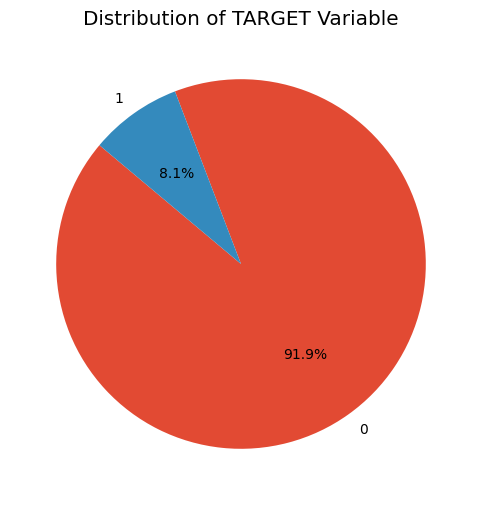

In [8]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of TARGET Variable')
plt.show()

This reveals that 8.1% of the dataset are defaulting customers while 91.9% are not.

In [9]:
Target0 = app_df.loc[app_df["TARGET"]==0] 
Target1 = app_df.loc[app_df["TARGET"]==1]

round(len(Target0)/len(Target1),2)

11.39

The imbalance ratio of non-defaulters to defaulter is "11.39". This simply means for every one defaulter, there is approximately 11 non-defaulters.

NULL CHECKING AND HANDLING

In [10]:
#null checking

(app_df.isnull().sum()/len(app_df)*100).sort_values(ascending = False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

It is evident that there are lots of columns with missing values. We need to investigate further and drop columns with null values higher than 40%.

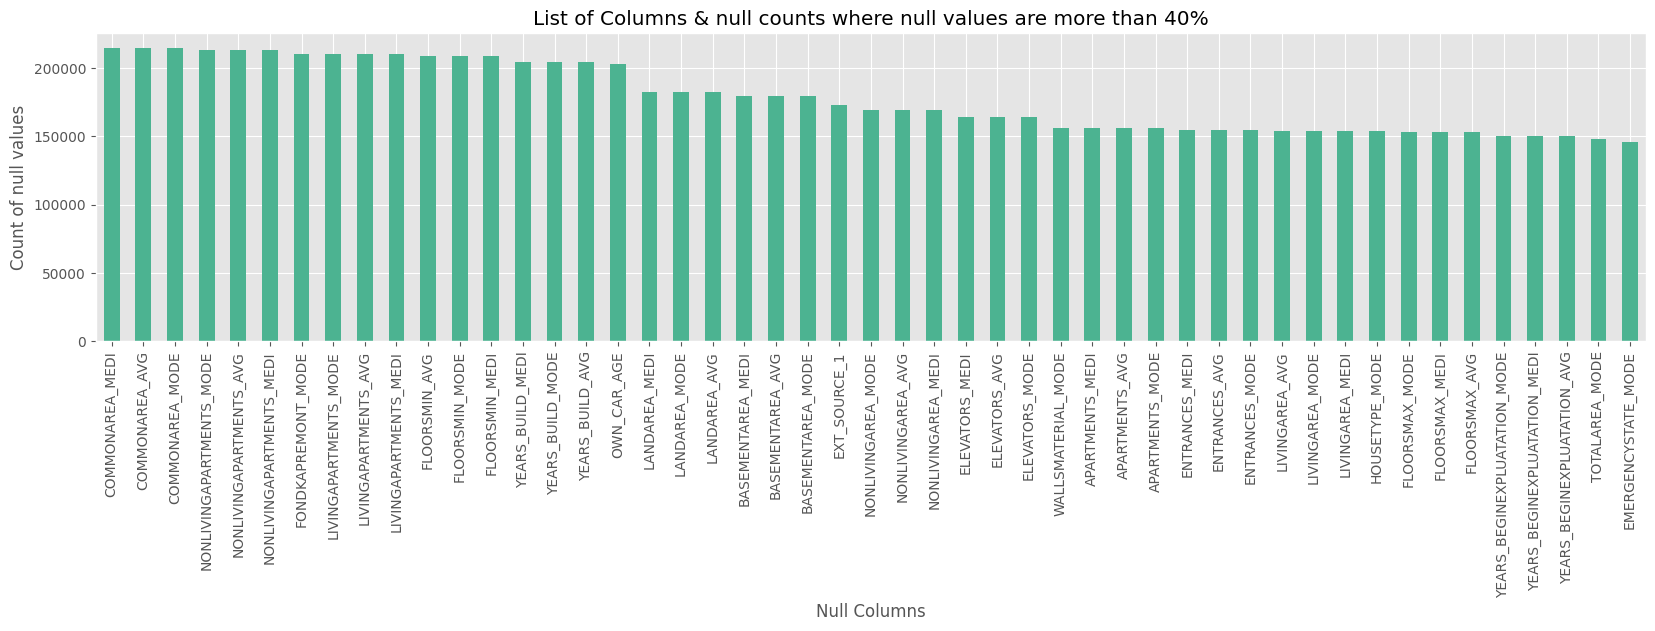

In [11]:
null_col = app_df.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.40*len(app_df))]


#Plotting Bar Graph for null values greater than 40%

plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="#4CB391")                           
plt.title('List of Columns & null counts where null values are more than 40%') 

plt.xlabel("Null Columns",fontdict={"fontsize":12,"fontweight":5}) 
plt.ylabel("Count of null values",fontdict={"fontsize":12,"fontweight":5})
plt.show()

In [12]:
len(null_col)

49

In [13]:
cols_to_drop = list(null_col.index.values) #Making list of column names having null values greater than 40%

app_df.drop(labels = cols_to_drop,axis=1,inplace = True) #Dropping those columns 

In [14]:
app_df.shape

(307511, 73)

In [15]:
#Checking for left-out columns with null

null_left = (app_df.isnull().sum()/len(app_df)*100).sort_values(ascending = False).head(20)
null_left

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
dtype: float64

In [16]:
#OCCUPATION_TYPE COLUMN

app_df['OCCUPATION_TYPE'].isnull().sum()

96391

In [17]:
app_df.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [18]:
app_df.NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [19]:
app_df[['NAME_INCOME_TYPE','OCCUPATION_TYPE']].head(20)

NAME_INCOME_TYPE OCCUPATION_TYPE
0                Working        Laborers
1          State servant      Core staff
2                Working        Laborers
3                Working        Laborers
4                Working      Core staff
5          State servant        Laborers
6   Commercial associate     Accountants
7          State servant        Managers
8              Pensioner             NaN
9                Working        Laborers
10               Working      Core staff
11             Pensioner             NaN
12               Working        Laborers
13               Working         Drivers
14               Working        Laborers
15               Working        Laborers
16               Working         Drivers
17               Working        Laborers
18               Working        Laborers
19         State servant      Core staff

In [20]:
app_df[['NAME_INCOME_TYPE','OCCUPATION_TYPE']].tail(20)

NAME_INCOME_TYPE        OCCUPATION_TYPE
307491  Commercial associate                Drivers
307492               Working            Sales staff
307493               Working         Security staff
307494  Commercial associate                Drivers
307495               Working  High skill tech staff
307496               Working          Cooking staff
307497               Working            Sales staff
307498  Commercial associate               Laborers
307499  Commercial associate         Medicine staff
307500               Working                    NaN
307501  Commercial associate     Low-skill Laborers
307502               Working               Laborers
307503  Commercial associate             Core staff
307504               Working            Sales staff
307505             Pensioner                    NaN
307506               Working            Sales staff
307507             Pensioner                    NaN
307508               Working               Managers
307509  Commercial associate               Laborers
307510  Commercial associate               Laborers

By investigating the first 20 record of NAME_INCOME_TYPE, OCCUPATION_TYPE features, It was observed that the 2 NaN values are associated with Pensioner.

Similarly, by investigating the last 20 record of NAME_INCOME_TYPE, OCCUPATION_TYPE features, It was observed that 2 out of 3 NaN values are associated with Pensioner.

On this evidence, NaN observations will be replaced with 'Pensioner' in 'OCCUPATION_TYPE' feature.

In [21]:
app_df['OCCUPATION_TYPE'].fillna('Pensioner',inplace=True)

In [22]:
app_df[['NAME_INCOME_TYPE','OCCUPATION_TYPE']].head(20)

NAME_INCOME_TYPE OCCUPATION_TYPE
0                Working        Laborers
1          State servant      Core staff
2                Working        Laborers
3                Working        Laborers
4                Working      Core staff
5          State servant        Laborers
6   Commercial associate     Accountants
7          State servant        Managers
8              Pensioner       Pensioner
9                Working        Laborers
10               Working      Core staff
11             Pensioner       Pensioner
12               Working        Laborers
13               Working         Drivers
14               Working        Laborers
15               Working        Laborers
16               Working         Drivers
17               Working        Laborers
18               Working        Laborers
19         State servant      Core staff

In [23]:
app_df['OCCUPATION_TYPE'].isnull().sum()

0

In [24]:
#EXT_SOURCE_3 AND EXT_SOURCE_2
#This are continous variables, we check for skewness

app_df['EXT_SOURCE_3'].skew()

-0.409390459464618

In [25]:
app_df['EXT_SOURCE_2'].skew()

-0.7935760449284998

Since both columns are negatively skewed, we replace NaN with median values

In [26]:
app_df.EXT_SOURCE_3.fillna(app_df.EXT_SOURCE_3.median() , inplace = True)

app_df.EXT_SOURCE_2.fillna(app_df.EXT_SOURCE_2.median() , inplace = True)

In [27]:
#AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK 
#AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR

#Since these are numeric columns and percentage of null values are below 15% for all columns, filling NaN values with Mode is advisable.

app_df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(app_df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True)

app_df.AMT_REQ_CREDIT_BUREAU_MON.fillna(app_df.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True) 

app_df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(app_df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True)

app_df.AMT_REQ_CREDIT_BUREAU_DAY.fillna(app_df.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True) 

app_df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(app_df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True) 

app_df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(app_df.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)

In [28]:
#NAME_TYPE_SUITE 

#This is a categorical column, we will replace with Mode

app_df.NAME_TYPE_SUITE.fillna(app_df.NAME_TYPE_SUITE.mode()[0],inplace = True)

In [29]:
#OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE 
#OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE

#These are count columns based on observed and defaulted DPD, It's better to replace NaN with Zero by assuming missing values are as a result of no observable or defaulted connections within the specified days.

OBS_DEF_columns = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

for column in OBS_DEF_columns:
    app_df[column].fillna(0, inplace=True)

In [30]:
#AMT_ANNUITY AMT_GOODS_PRICE
#These are continuous variables, we check for skewness

app_df['AMT_ANNUITY'].skew()

1.5797773638612507

In [31]:
app_df['AMT_GOODS_PRICE'].skew()

1.3490003414747445

Since both columns are positively skewed, we replace NaN with median values

In [32]:
app_df['AMT_ANNUITY'].fillna(app_df['AMT_ANNUITY'].median(),inplace=True)
app_df['AMT_GOODS_PRICE'].fillna(app_df['AMT_GOODS_PRICE'].median(),inplace=True)

In [33]:
#CNT_FAM_MEMBERS
#This is a numeric count column, we replace with Mode

app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.mode()[0] , inplace = True)

In [34]:
#DAYS_LAST_PHONE_CHANGE

app_df['DAYS_LAST_PHONE_CHANGE'].head(5)

0   -1134.0
1    -828.0
2    -815.0
3    -617.0
4   -1106.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [36]:
'''
This is a numeric column, 
1. values will be standardized by taking absolute values
2. replace few missing values with Mode
'''
app_df['DAYS_LAST_PHONE_CHANGE']=app_df['DAYS_LAST_PHONE_CHANGE'].abs()

app_df['DAYS_LAST_PHONE_CHANGE'].fillna(app_df['DAYS_LAST_PHONE_CHANGE'].mode,inplace=True)

In [37]:
final_null_check = (app_df.isnull().sum()/len(app_df)*100).sort_values(ascending = False)
final_null_check

SK_ID_CURR                    0.0
REG_CITY_NOT_WORK_CITY        0.0
FLAG_DOCUMENT_8               0.0
FLAG_DOCUMENT_7               0.0
FLAG_DOCUMENT_6               0.0
                             ... 
FLAG_CONT_MOBILE              0.0
FLAG_WORK_PHONE               0.0
FLAG_EMP_PHONE                0.0
FLAG_MOBIL                    0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 73, dtype: float64

No further missing values

DATA CLEANING - STANDARDIZATION

In [38]:
#Due to observation on "DAYS_LAST_PHONE_CHANGE" column, there is a need to inspect similar columns with days

app_df_days = [i for i in app_df if i.startswith('DAYS')]

app_df_days.remove("DAYS_LAST_PHONE_CHANGE")

In [39]:
app_df[app_df_days]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0            -9461           -637            -3648.0            -2120
1           -16765          -1188            -1186.0             -291
2           -19046           -225            -4260.0            -2531
3           -19005          -3039            -9833.0            -2437
4           -19932          -3038            -4311.0            -3458
...            ...            ...                ...              ...
307506       -9327           -236            -8456.0            -1982
307507      -20775         365243            -4388.0            -4090
307508      -14966          -7921            -6737.0            -5150
307509      -11961          -4786            -2562.0             -931
307510      -16856          -1262            -5128.0             -410

[307511 rows x 4 columns]

Since the data in DAYS columns are negative values, they need to be standardized by taking the absolute values.

In [40]:
app_df[app_df_days] = abs(app_df[app_df_days])

app_df[app_df_days].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0        9461            637             3648.0             2120
1       16765           1188             1186.0              291
2       19046            225             4260.0             2531
3       19005           3039             9833.0             2437
4       19932           3038             4311.0             3458

DATA CLEANING - HANDLE COLUMN WITH XNA VALUES

In [41]:
#GENDER

app_df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [42]:
#We replace the XNA values with 'F' which is the highest occuring gender

app_df.loc[app_df.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F' 
app_df['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [43]:
#ORGANIZATION_TYPE

app_df['ORGANIZATION_TYPE'].value_counts().head()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: count, dtype: int64

In [44]:
app_df[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(20)

ORGANIZATION_TYPE      NAME_INCOME_TYPE
0   Business Entity Type 3               Working
1                   School         State servant
2               Government               Working
3   Business Entity Type 3               Working
4                 Religion               Working
5                    Other         State servant
6   Business Entity Type 3  Commercial associate
7                    Other         State servant
8                      XNA             Pensioner
9              Electricity               Working
10                Medicine               Working
11                     XNA             Pensioner
12  Business Entity Type 2               Working
13           Self-employed               Working
14       Transport: type 2               Working
15  Business Entity Type 2               Working
16              Government               Working
17            Construction               Working
18                 Housing               Working
19            Kindergarten         State servant

By investigating the first 20 record of NAME_INCOME_TYPE, ORGANIZATION_TYPE features, It was observed that ORGANIZATION_TYPE's XNA values are associated with Pensioner.

On this evidence, XNA values will be replaced with 'Pensioner' in 'ORGANIZATION_TYPE' feature.

In [45]:
app_df['ORGANIZATION_TYPE'] = app_df['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')
app_df['ORGANIZATION_TYPE'].value_counts().head()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Pensioner                 55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: count, dtype: int64

In [ ]:
DATA ENGINEERING - BINNING AND GROUPING

In [46]:
#DAYS_BIRTH

app_df['DAYS_BIRTH']= (app_df['DAYS_BIRTH']/365).astype(int)
app_df['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [47]:
app_df['AGE_GROUP']=pd.cut(app_df['DAYS_BIRTH'],                 
                         bins=[19,25,40,60,100], labels=['Very_Young','Youth', 'Middle_Age', 'Elder'])

In [48]:
app_df[['DAYS_BIRTH','AGE_GROUP']]

DAYS_BIRTH   AGE_GROUP
0               25  Very_Young
1               45  Middle_Age
2               52  Middle_Age
3               52  Middle_Age
4               54  Middle_Age
...            ...         ...
307506          25  Very_Young
307507          56  Middle_Age
307508          41  Middle_Age
307509          32       Youth
307510          46  Middle_Age

[307511 rows x 2 columns]

In [49]:
#AMT_CREDIT

app_df['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [50]:
#Bin into groups

bin_edges = [45000, 270000, 513531, 808650, 1200000, 1600000, 2000000, 2500000, 4050000]
bin_labels = ['45k-270k', '270k-513.5k', '513.5k-808.65k', '808.65k-1.2M', '1.2M-1.6M', '1.6M-2M', '2M-2.5M', '2.5M-4.05M']

In [51]:
# Create a new column 'AMT_CREDIT_GROUP' based on the bins and labels

app_df['AMT_CREDIT_GROUP'] = pd.cut(app_df['AMT_CREDIT'], bins=bin_edges, labels=bin_labels, right=False)

In [52]:
app_df['AMT_CREDIT_GROUP'].value_counts()

AMT_CREDIT_GROUP
270k-513.5k       82480
513.5k-808.65k    73823
45k-270k          71180
808.65k-1.2M      52169
1.2M-1.6M         21161
1.6M-2M            4669
2M-2.5M            1668
2.5M-4.05M          353
Name: count, dtype: int64

In [53]:
#AMT_INCOME_TOTAL

app_df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [54]:
income_bins = [25650, 75000, 112500, 135000, 157500, 180000, 202500, 225000, 117000000]
income_labels = ["26k to 75k", "75k to 112.5k", "112.5k to 135k", "135k to 157.5k", "157.5k to 180k", "180k to 202.5k", "202.5k to 225k", "225k to 117M"]

In [55]:
# Creating a new column INCOME_GROUP
app_df['AMT_INCOME_GROUP'] = pd.cut(app_df['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels)

In [56]:
app_df.AMT_INCOME_GROUP.value_counts()

AMT_INCOME_GROUP
75k to 112.5k     76686
112.5k to 135k    48849
225k to 117M      47118
135k to 157.5k    33628
157.5k to 180k    32529
202.5k to 225k    24420
26k to 75k        23890
180k to 202.5k    20389
Name: count, dtype: int64

CORRELATION

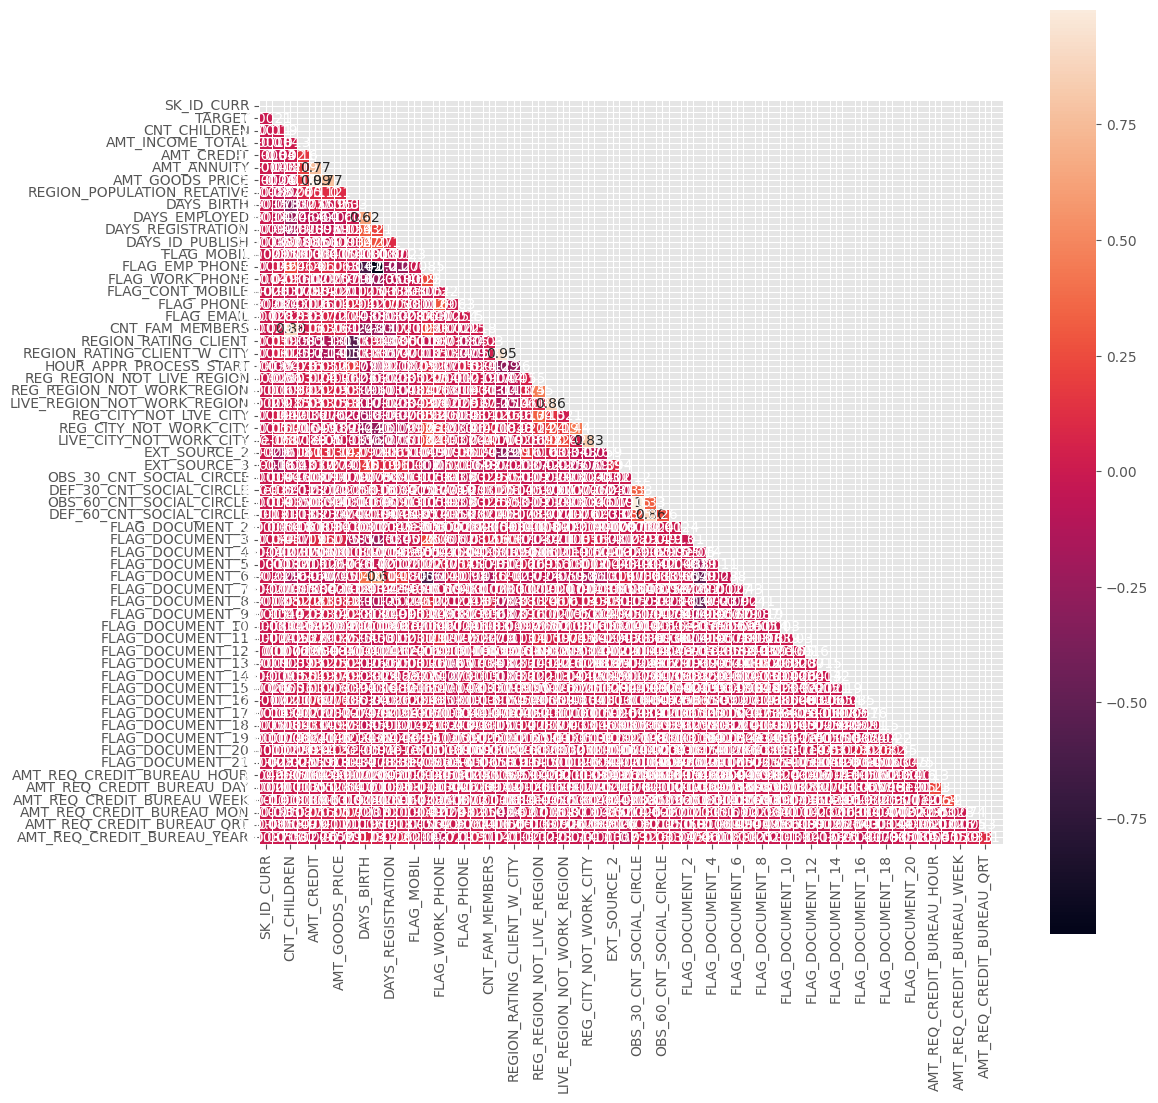

In [57]:
#using a heatmap to show correlation

fig, ax = plt.subplots(figsize=(12,12))
mask = np.triu(np.ones_like(app_df.corr(numeric_only=True), dtype=bool))
sns.heatmap(app_df.corr(numeric_only=True), linewidths=0.5, mask=mask, square=True, ax=ax, annot=True);

In [58]:
#CORRELATED COLUMNS WITH TARGET

correlation=app_df.corr(numeric_only=True)
correlation.TARGET.sort_values(ascending=True).head()

EXT_SOURCE_2      -0.160295
EXT_SOURCE_3      -0.155892
DAYS_BIRTH        -0.078234
DAYS_ID_PUBLISH   -0.051457
DAYS_EMPLOYED     -0.047046
Name: TARGET, dtype: float64

EXT_source_2 and EXT_SOURCE_3 columns have a high negative correlation with the target column. Hence we drop the two columns

In [59]:

app_df.drop(columns=["EXT_SOURCE_2","EXT_SOURCE_3"],inplace=True,axis=1)
app_df.shape

(307511, 74)

UNIVARIATE ANALYSIS

In [ ]:
app_df.info()

In [60]:
#The datatype of categorical columns below will be changed to category to suit univariate analysis
app_df['NAME_CONTRACT_TYPE'] = app_df['NAME_CONTRACT_TYPE'].astype('category')
app_df['CODE_GENDER'] = app_df['CODE_GENDER'].astype('category')
app_df['NAME_TYPE_SUITE'] = app_df['NAME_TYPE_SUITE'].astype('category')
app_df['NAME_INCOME_TYPE'] = app_df['NAME_INCOME_TYPE'].astype('category')
app_df['NAME_EDUCATION_TYPE'] = app_df['NAME_EDUCATION_TYPE'].astype('category')
app_df['NAME_FAMILY_STATUS'] = app_df['NAME_FAMILY_STATUS'].astype('category')
app_df['NAME_HOUSING_TYPE'] = app_df['NAME_HOUSING_TYPE'].astype('category')
app_df['OCCUPATION_TYPE'] = app_df['OCCUPATION_TYPE'].astype('category')
app_df['WEEKDAY_APPR_PROCESS_START'] = app_df['WEEKDAY_APPR_PROCESS_START'].astype('category')
app_df['ORGANIZATION_TYPE'] = app_df['ORGANIZATION_TYPE'].astype('category')

In [61]:
#After observations, these columns are to be dropped due to less relevance for analysis

drop_this_columns =['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [62]:
app_df[drop_this_columns].head()

FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  FLAG_EMAIL  \
0           0                     2                            2           0   
1           0                     1                            1           0   
2           0                     2                            2           0   
3           0                     2                            2           0   
4           0                     2                            2           0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  FLAG_DOCUMENT_2  \
0                     2                            2                0   
1                     1                            1                0   
2                     2                            2                0   
3                     2                            2                0   
4                     2                            2                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                0                0   
3                1                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   
3                0                0                0                 0   
4                0                1                0                 0   

   FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0                 0  
1                 0                 0                 0  
2                 0                 0                 0  
3                 0                 0                 0  
4                 0                 0                 0

In [ ]:
app_df.drop(labels=drop_this_columns,axis=1,inplace=True)

Text(0.5, 1.0, 'Gender Distribution for Defaulters')

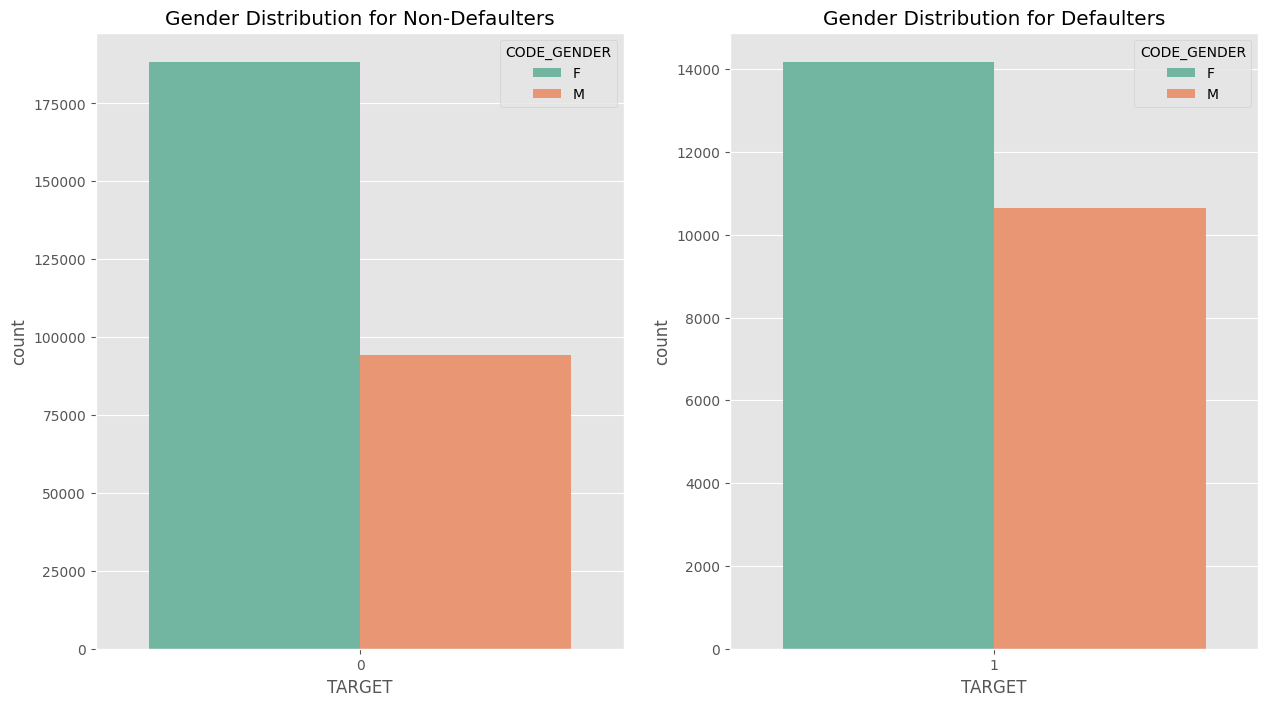

In [63]:
#GENDER DISTRIBUTION FOR NON-DEFAULTERS AND DEFAULTERS
Target0 = app_df.loc[app_df["TARGET"] == 0] 
Target1 = app_df.loc[app_df["TARGET"] == 1]

plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target0, palette = 'Set2')
plt.title("Gender Distribution for Non-Defaulters")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target1, palette = 'Set2')
plt.title("Gender Distribution for Defaulters")

Female clients applied more than than their male counterparts, but analysis revealed that the ratio of male defaulters is higher than female defaulters.

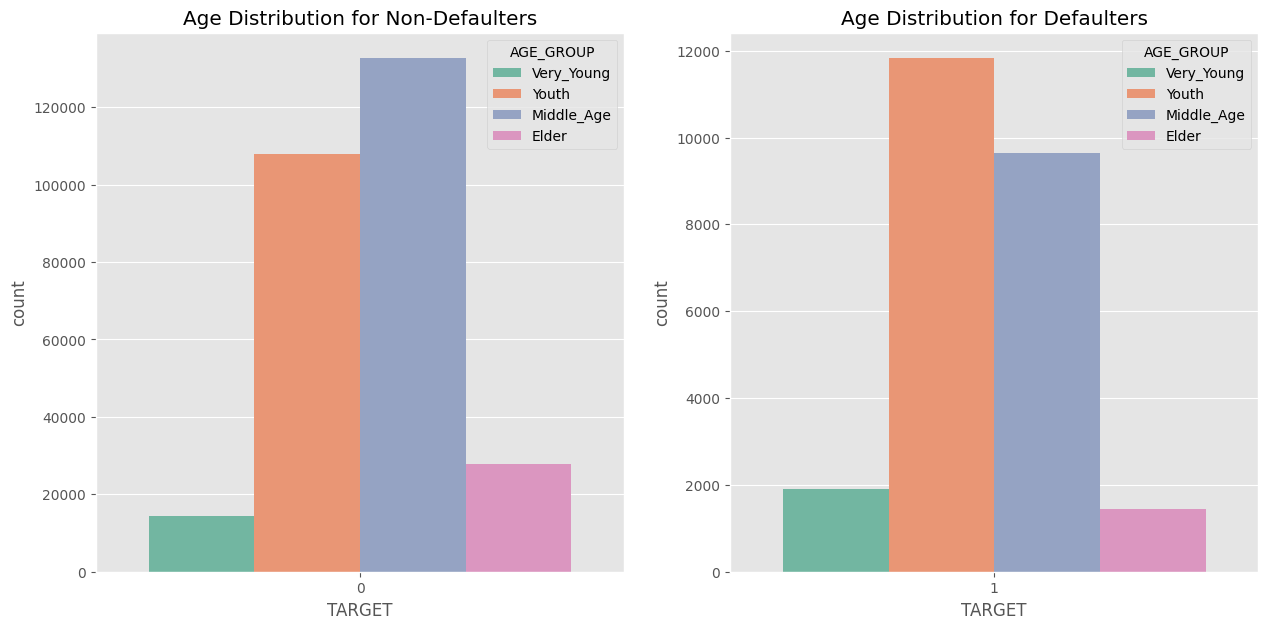

In [64]:
#AGE DISTRIBUTION FOR NON-DEFAULTERS AND DEFAULTERS

plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target0,palette='Set2')
plt.title("Age Distribution for Non-Defaulters")
plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target1,palette='Set2')
plt.title("Age Distribution for Defaulters")
plt.show()

Analysis revealed that the Youth age group has the highest number of defaulters

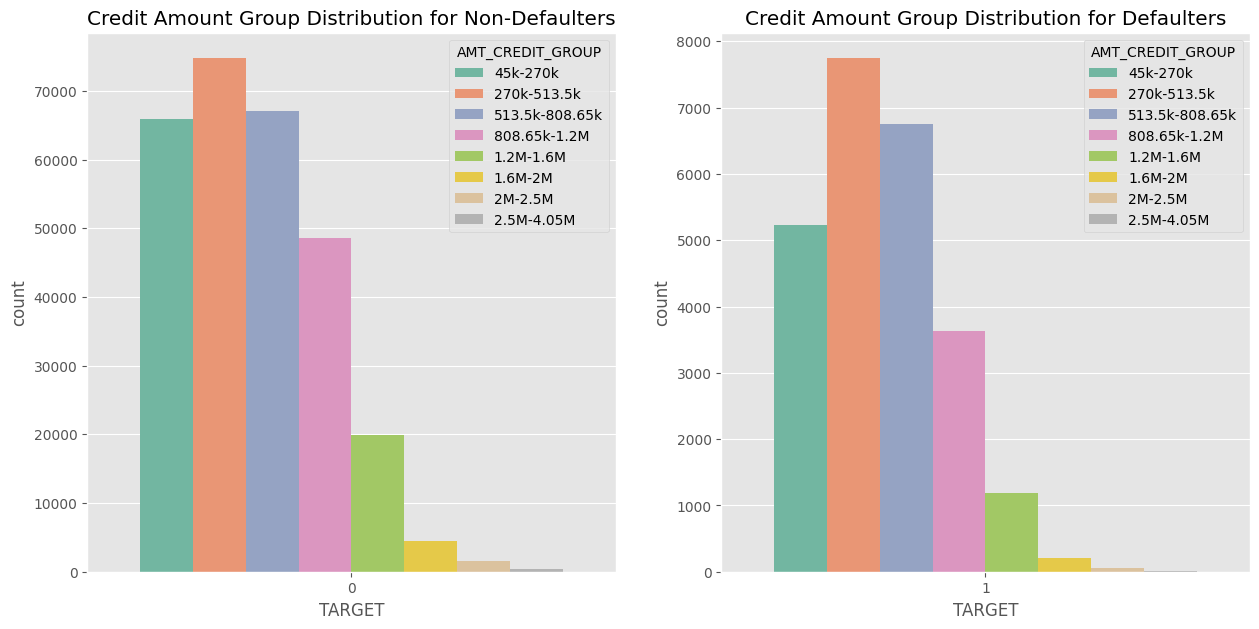

In [65]:
#CREDIT AMOUNT DISTRIBUTION FOR NON-DEFAULTERS AND DEFAULTERS

plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.countplot(x='TARGET',hue='AMT_CREDIT_GROUP',data=Target0,palette='Set2')
plt.title("Credit Amount Group Distribution for Non-Defaulters")
plt.subplot(122)
sns.countplot(x='TARGET',hue='AMT_CREDIT_GROUP',data=Target1,palette='Set2')
plt.title("Credit Amount Group Distribution for Defaulters")
plt.show()

Analysis revealed that credit amount within 270k - 513.5k were granted most and also has the highest number of defaulters. Observing the ratio of amount granted to number of defaulters, people granted the most least amount of 45k - 270k had less difficulty paying back their loans. 

UNIVARIATE ANALYSIS - CUSTOM FUNCTION

In [66]:
categorical_col = list(app_df.select_dtypes(include= 'category').columns) 

# Removing CODE_GENDER','AGE_GROUP', 'AMT_CREDIT_GROUP' because we have already taken up the insights from  above plots
categorical_col.remove('CODE_GENDER')
categorical_col.remove('AGE_GROUP')
categorical_col.remove('AMT_CREDIT_GROUP') 

categorical_col

['NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'AMT_INCOME_GROUP']

In [67]:
def categorical_plot(var):
    plt.figure(figsize=(40,20))
    
    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 1)
    sns.countplot(x='TARGET', hue=var, data=Target0, palette = 'Set3') 
    plt.xlabel(var, fontsize= 30, fontweight="bold")                                                    
    plt.ylabel('NON DEFAULTERS', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    
    
    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 2)
    sns.countplot(x='TARGET', hue=var, data=Target1, palette = 'Set1') 
    plt.xlabel(var, fontsize= 30, fontweight="bold")
    plt.ylabel('DEFAULTERS', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    plt.show()

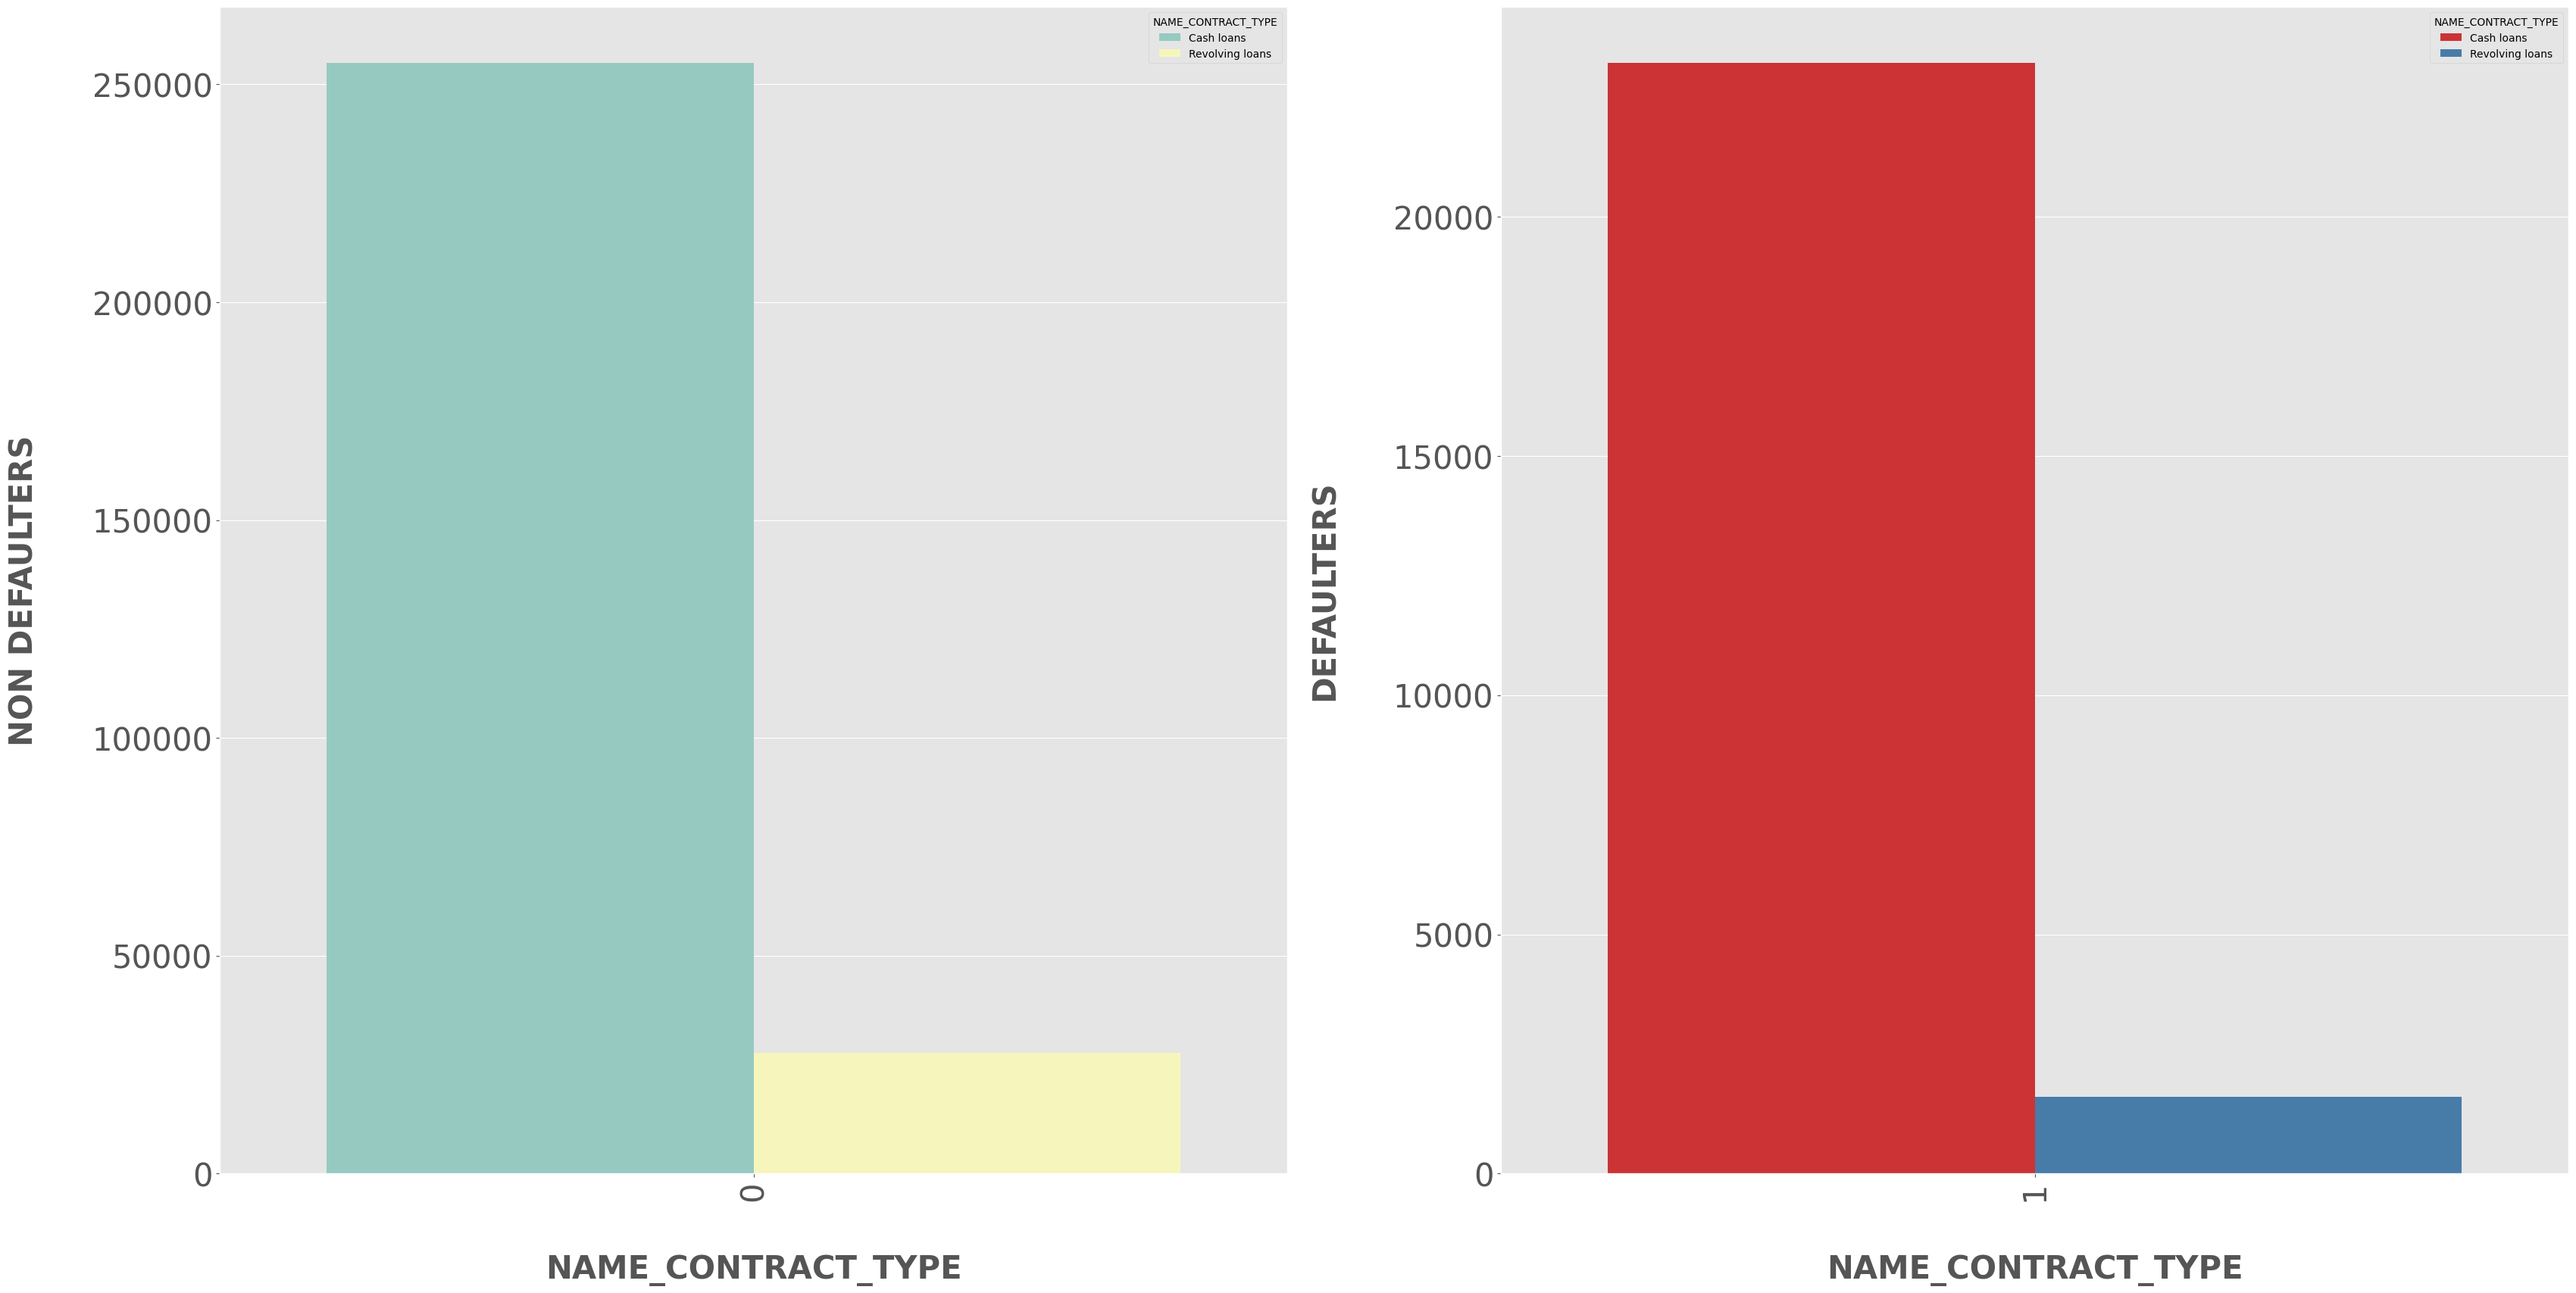

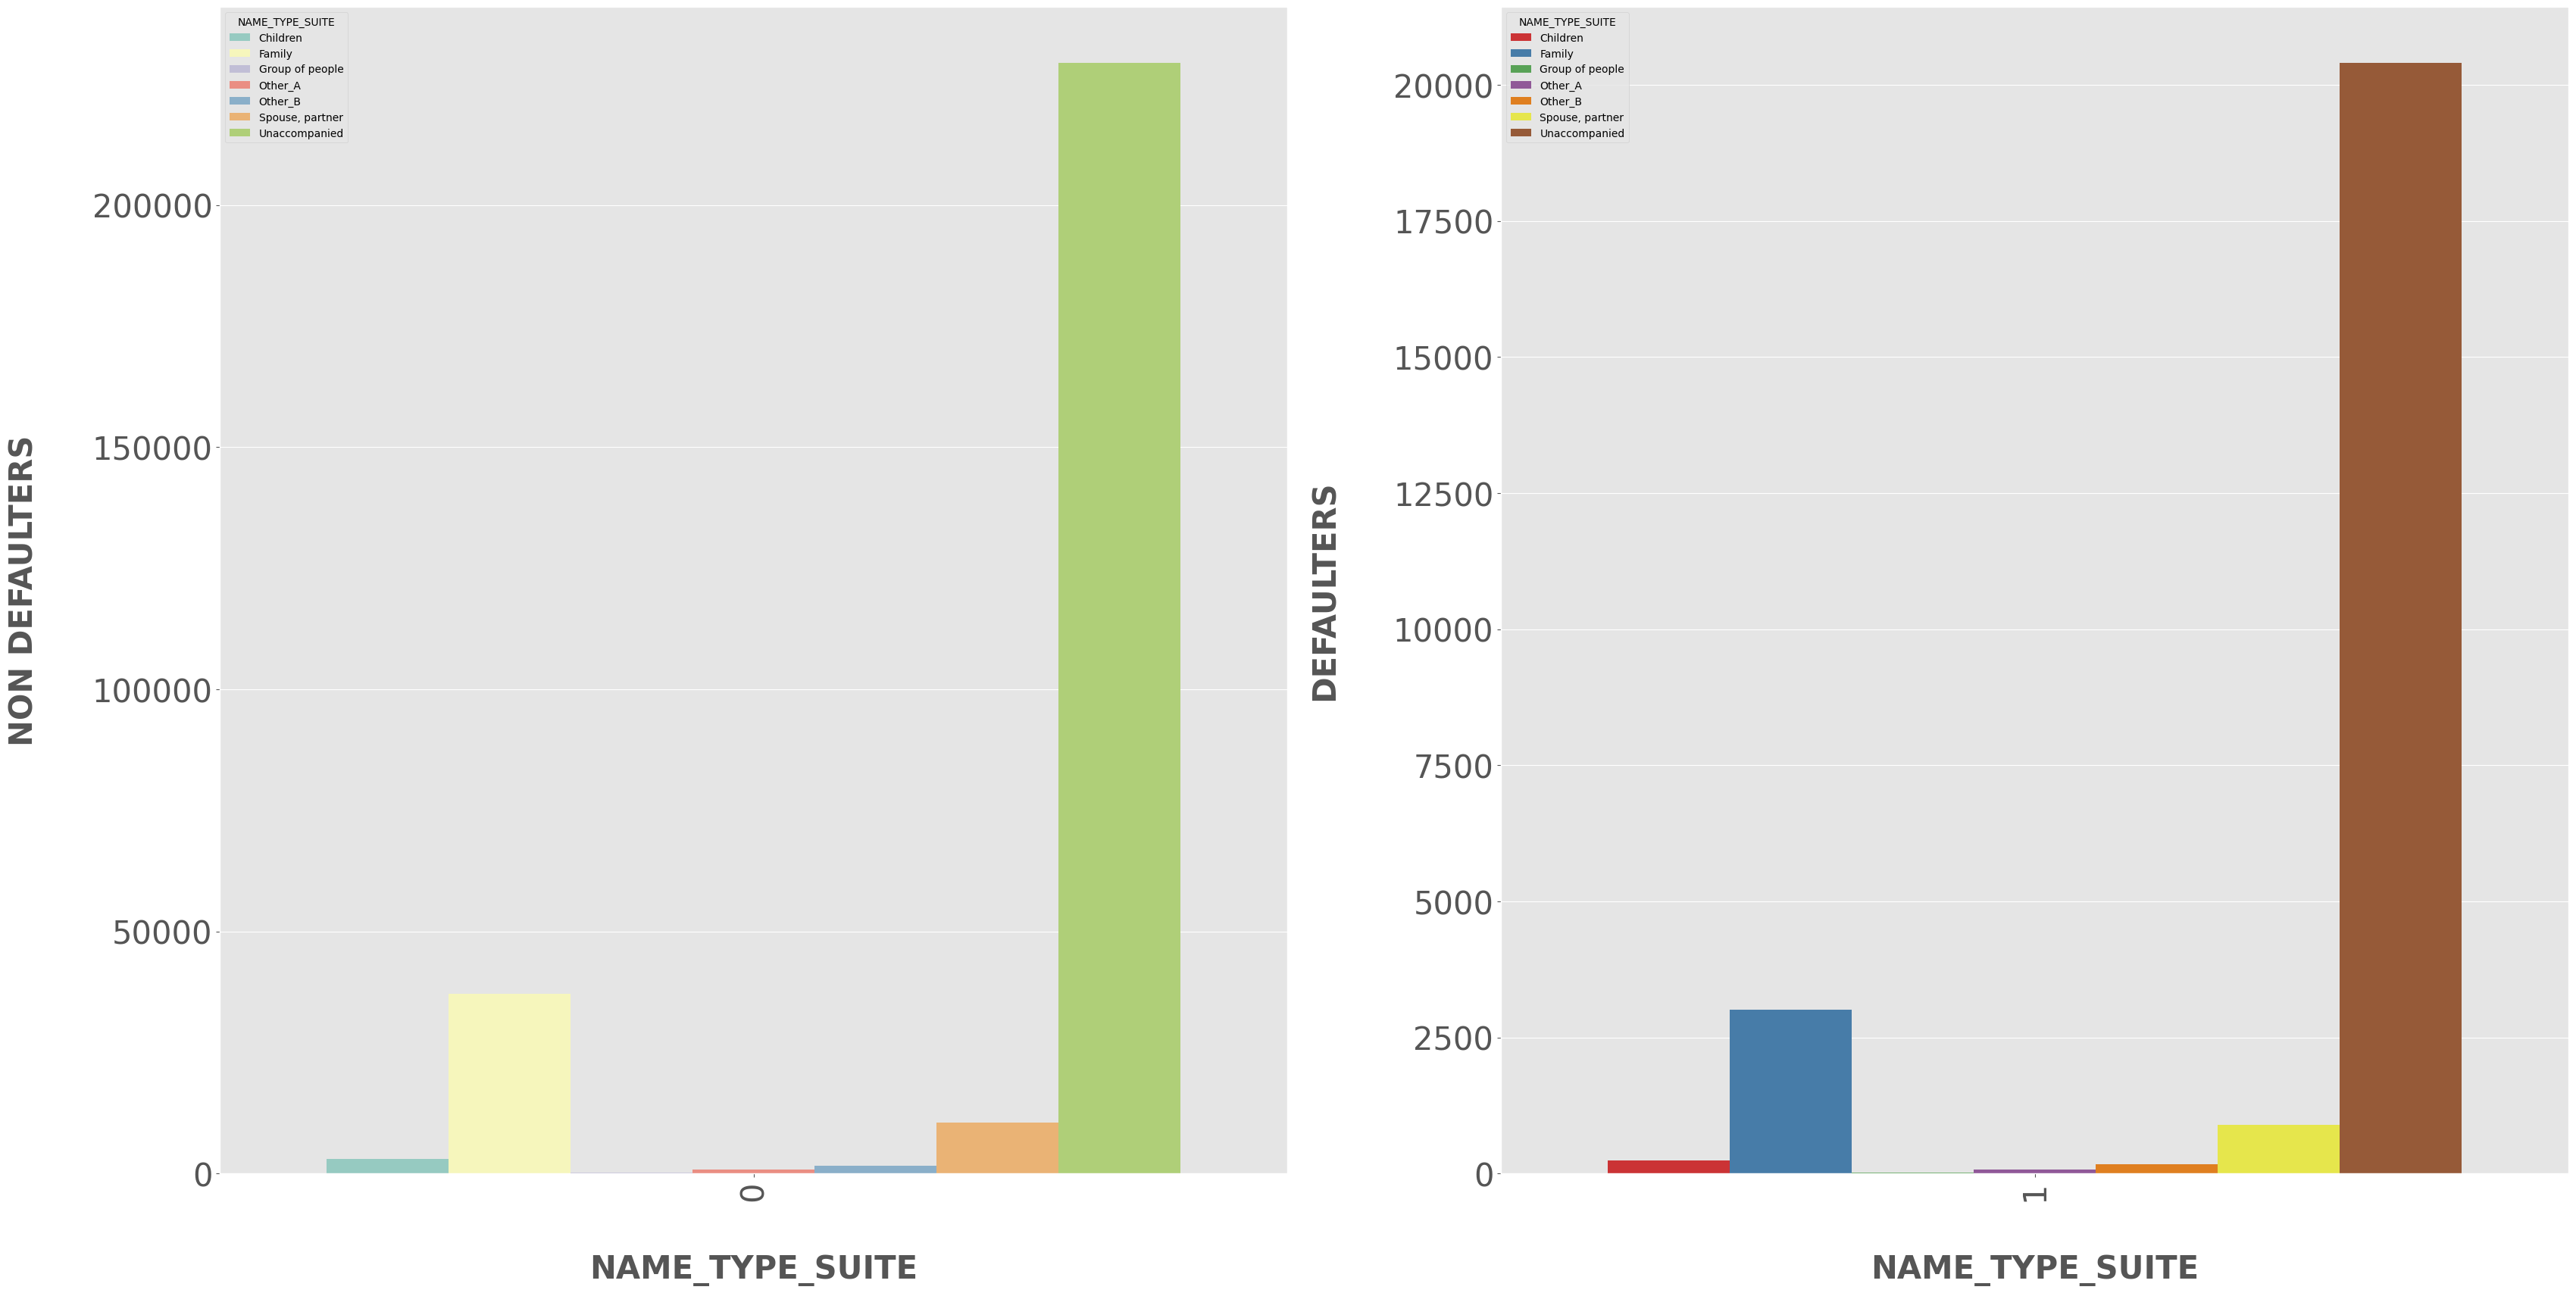

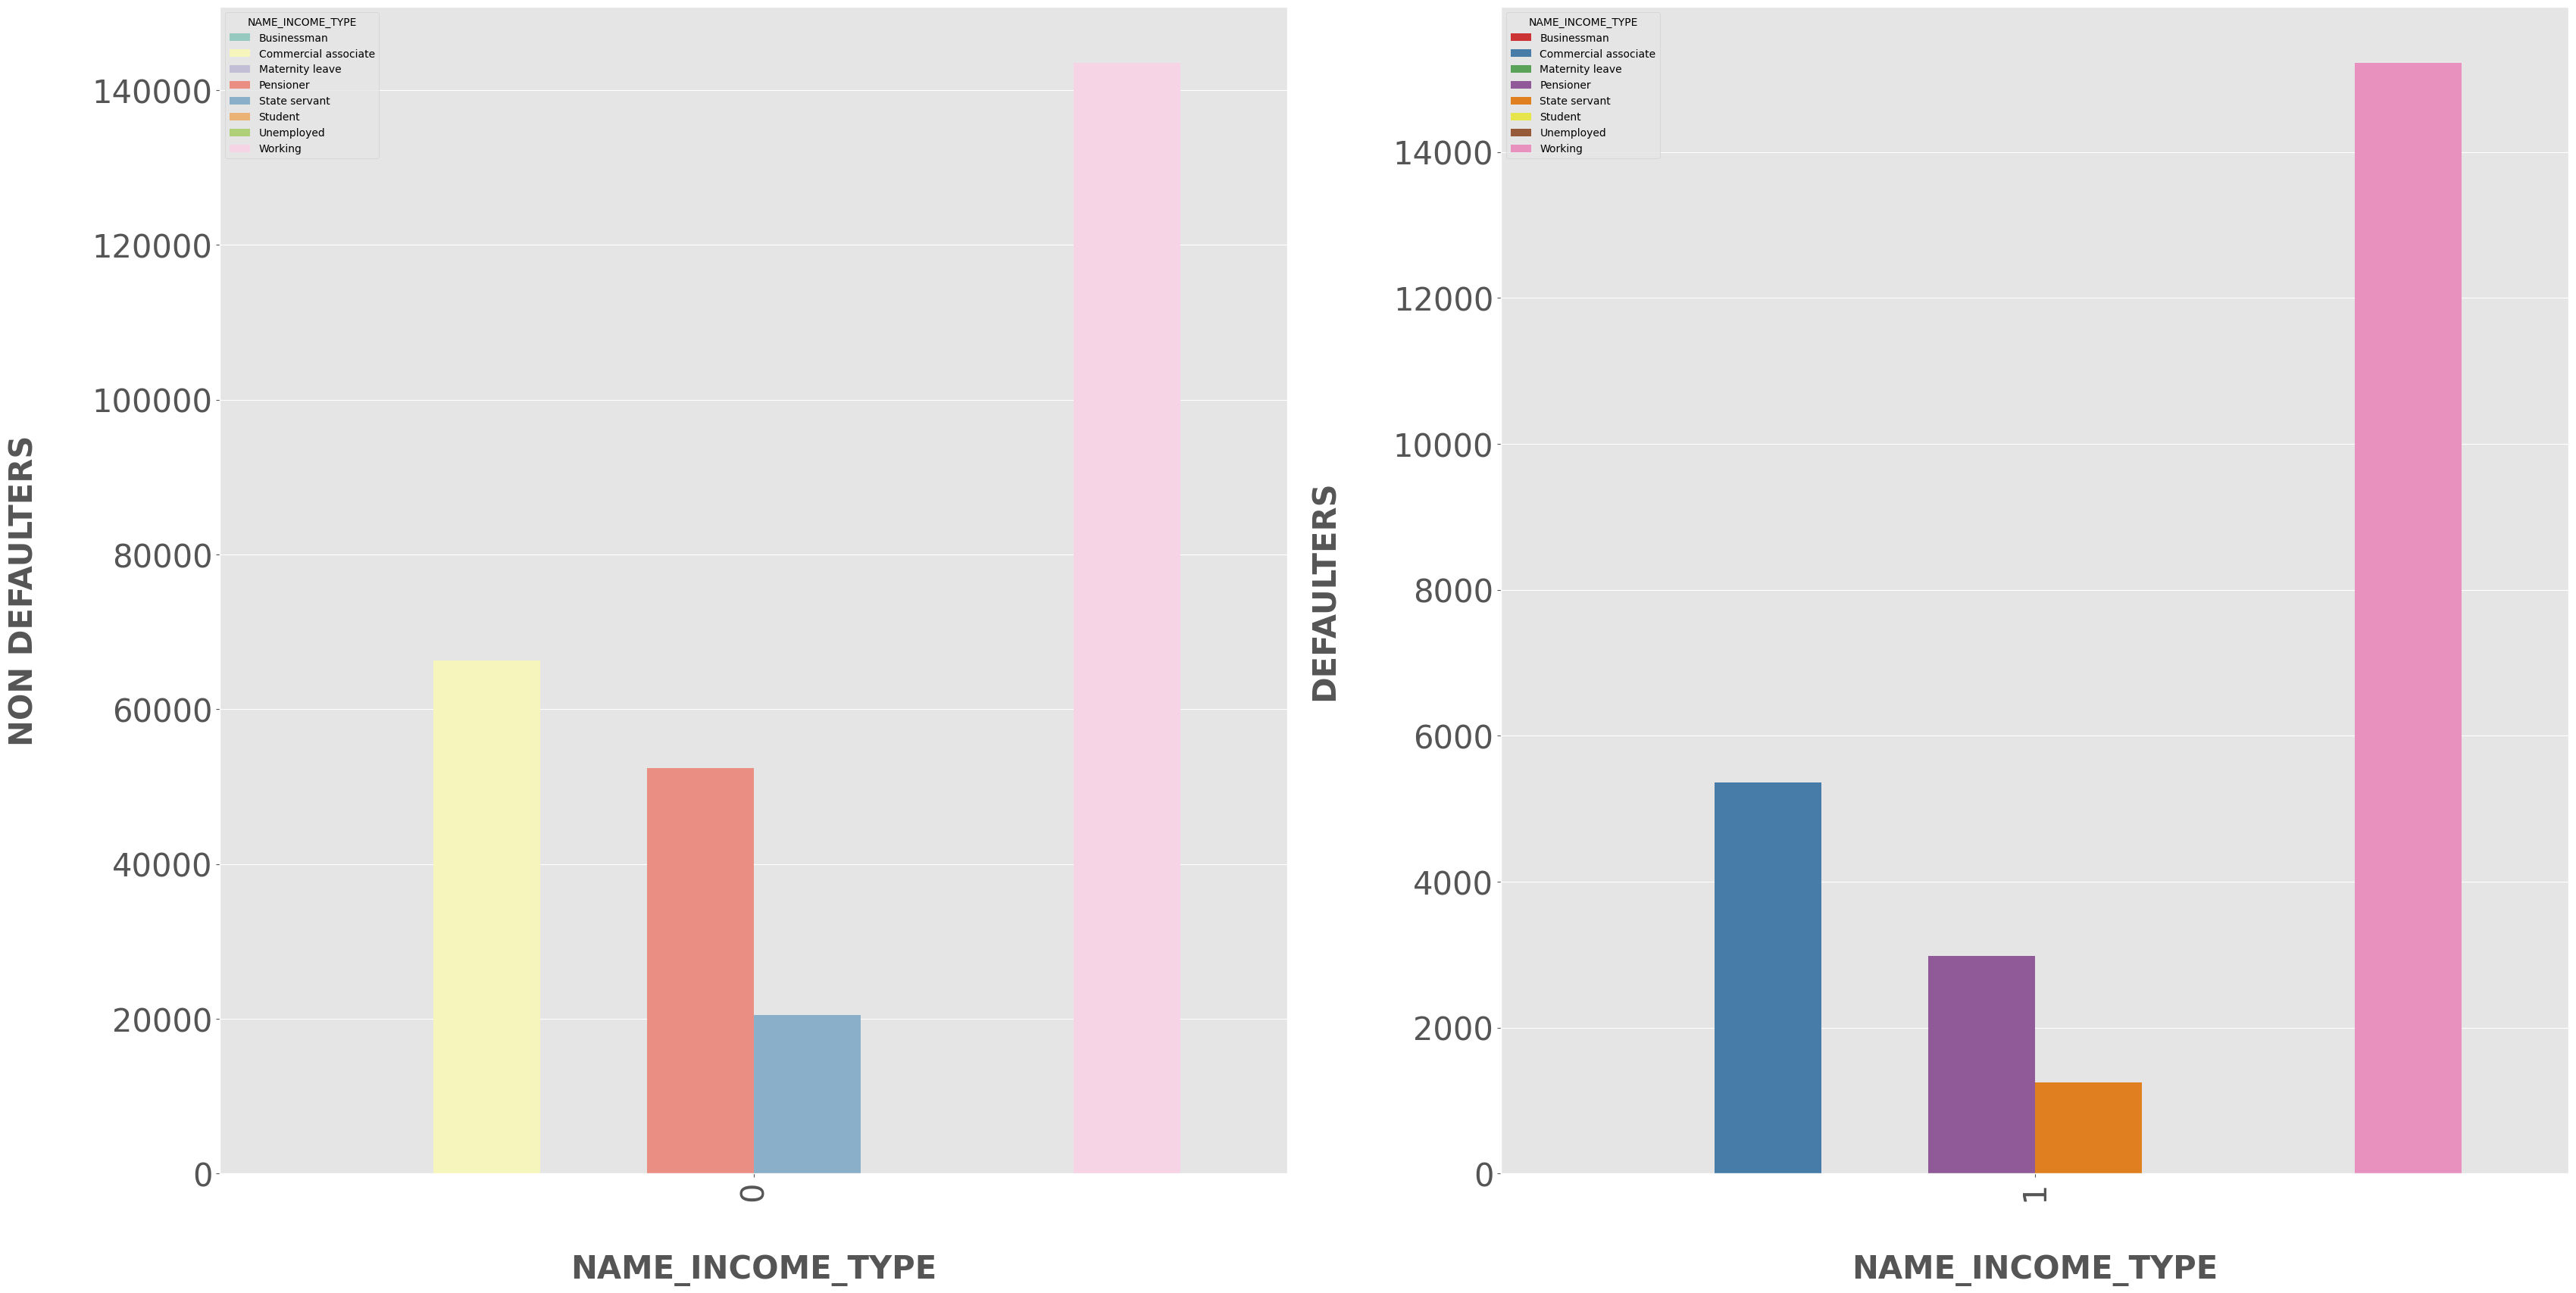

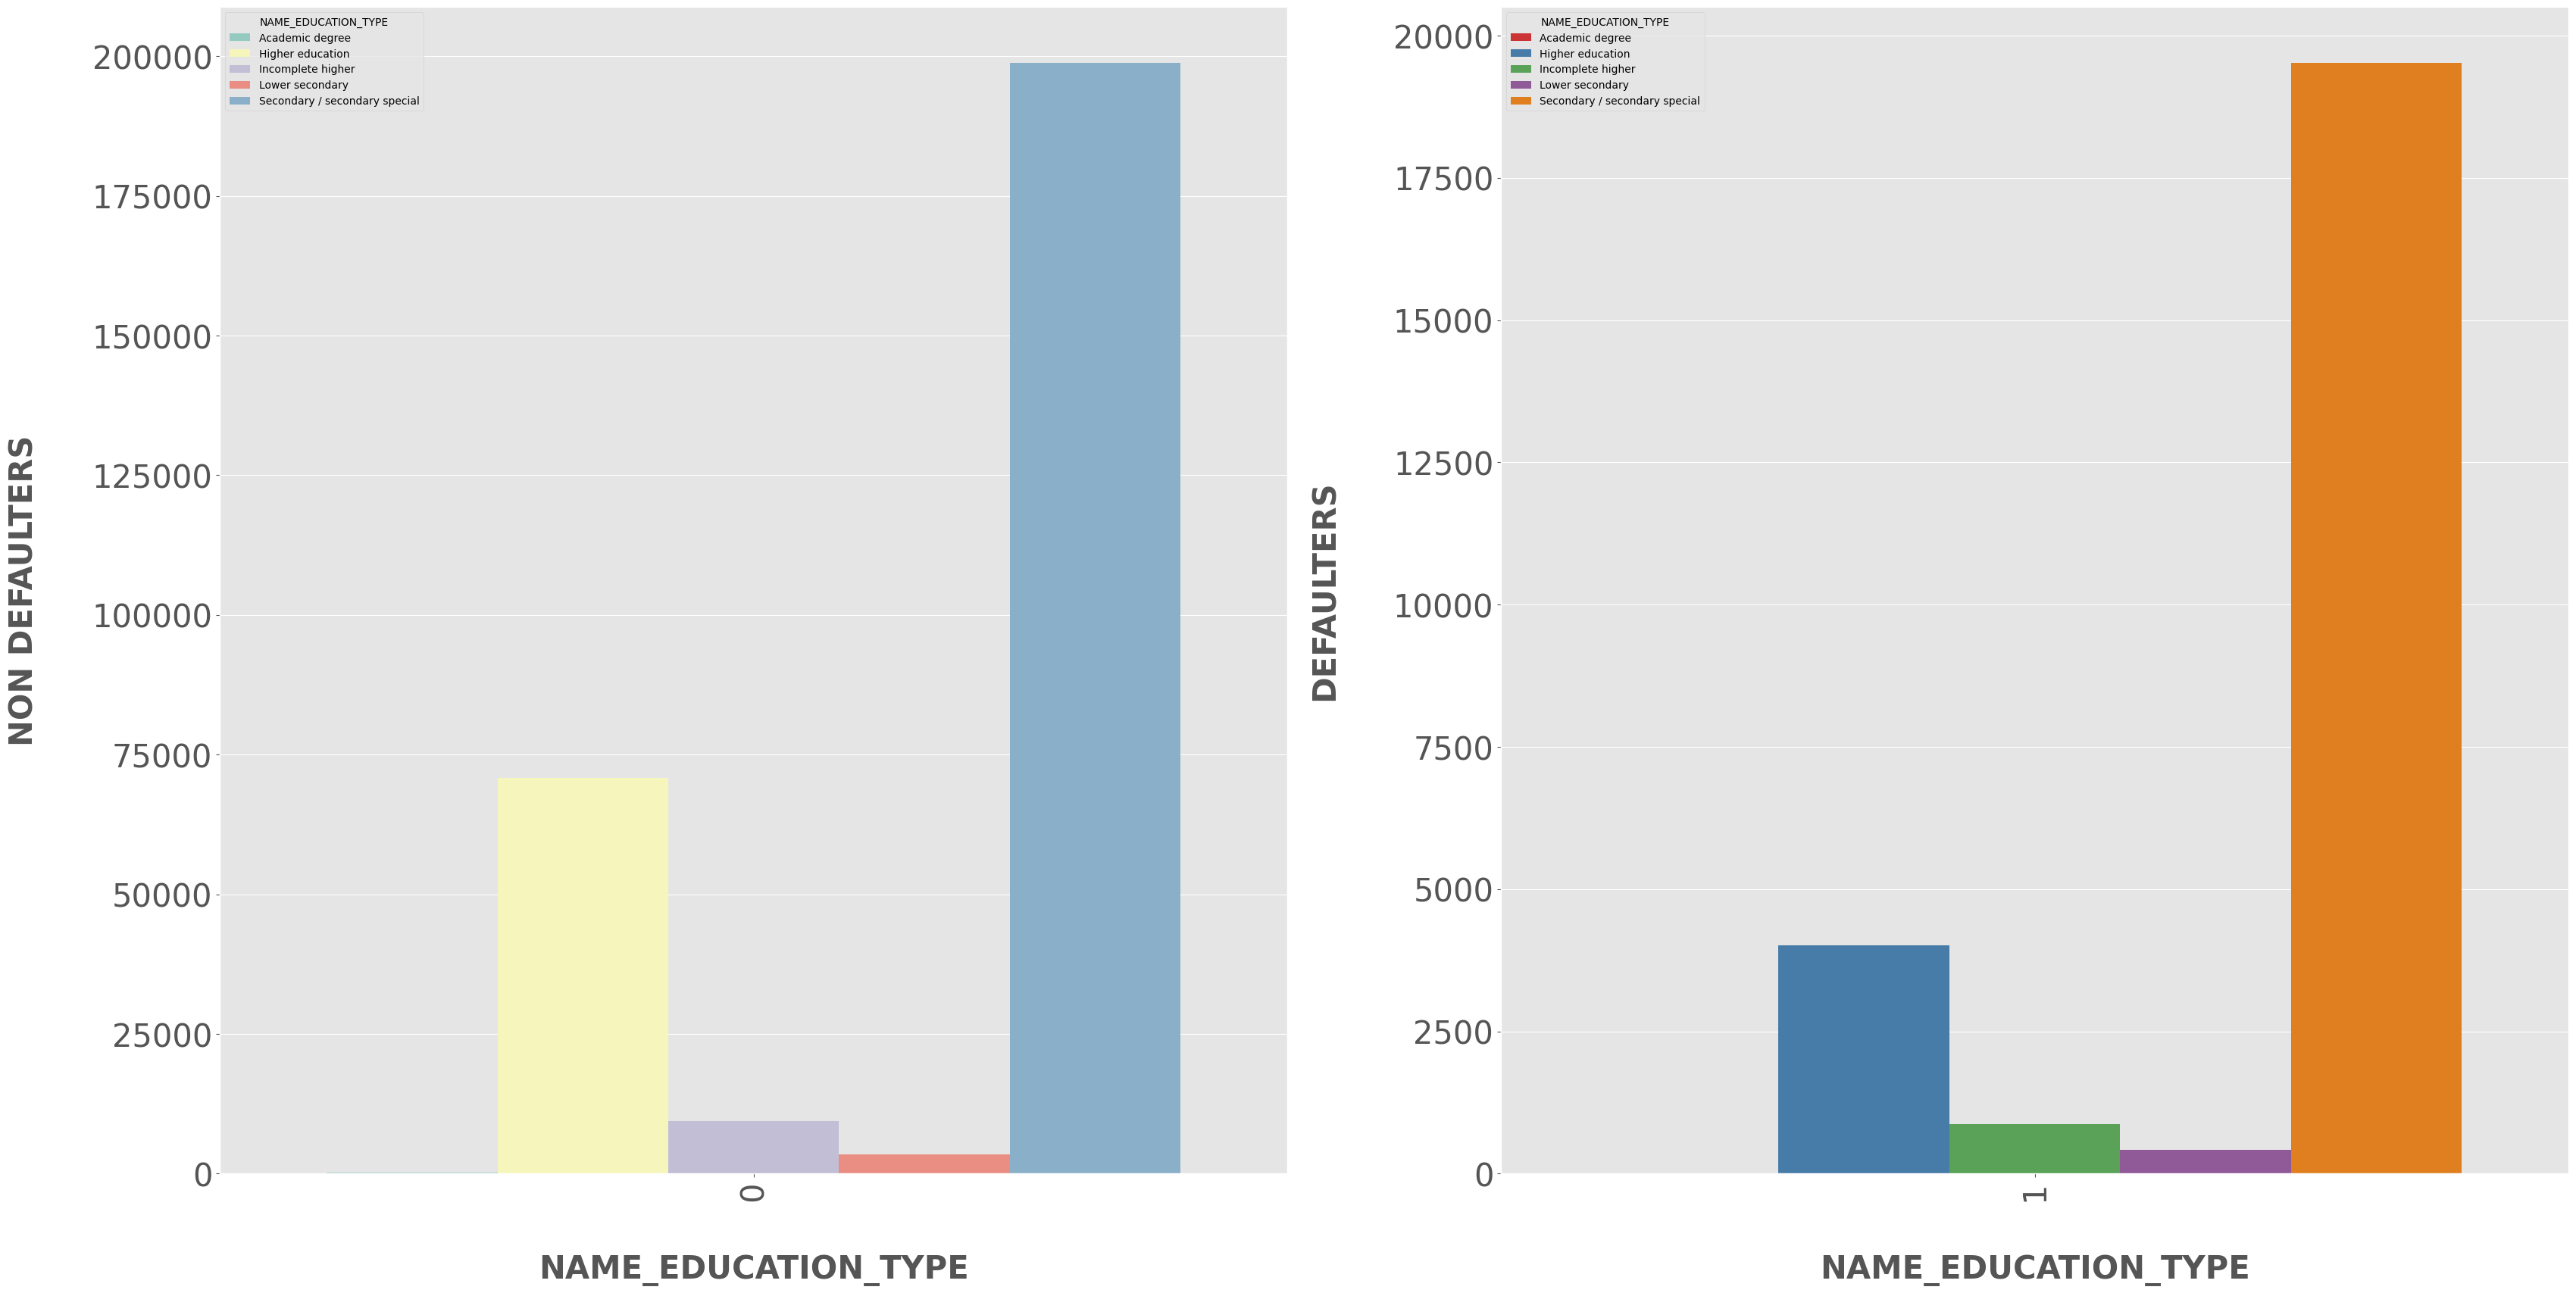

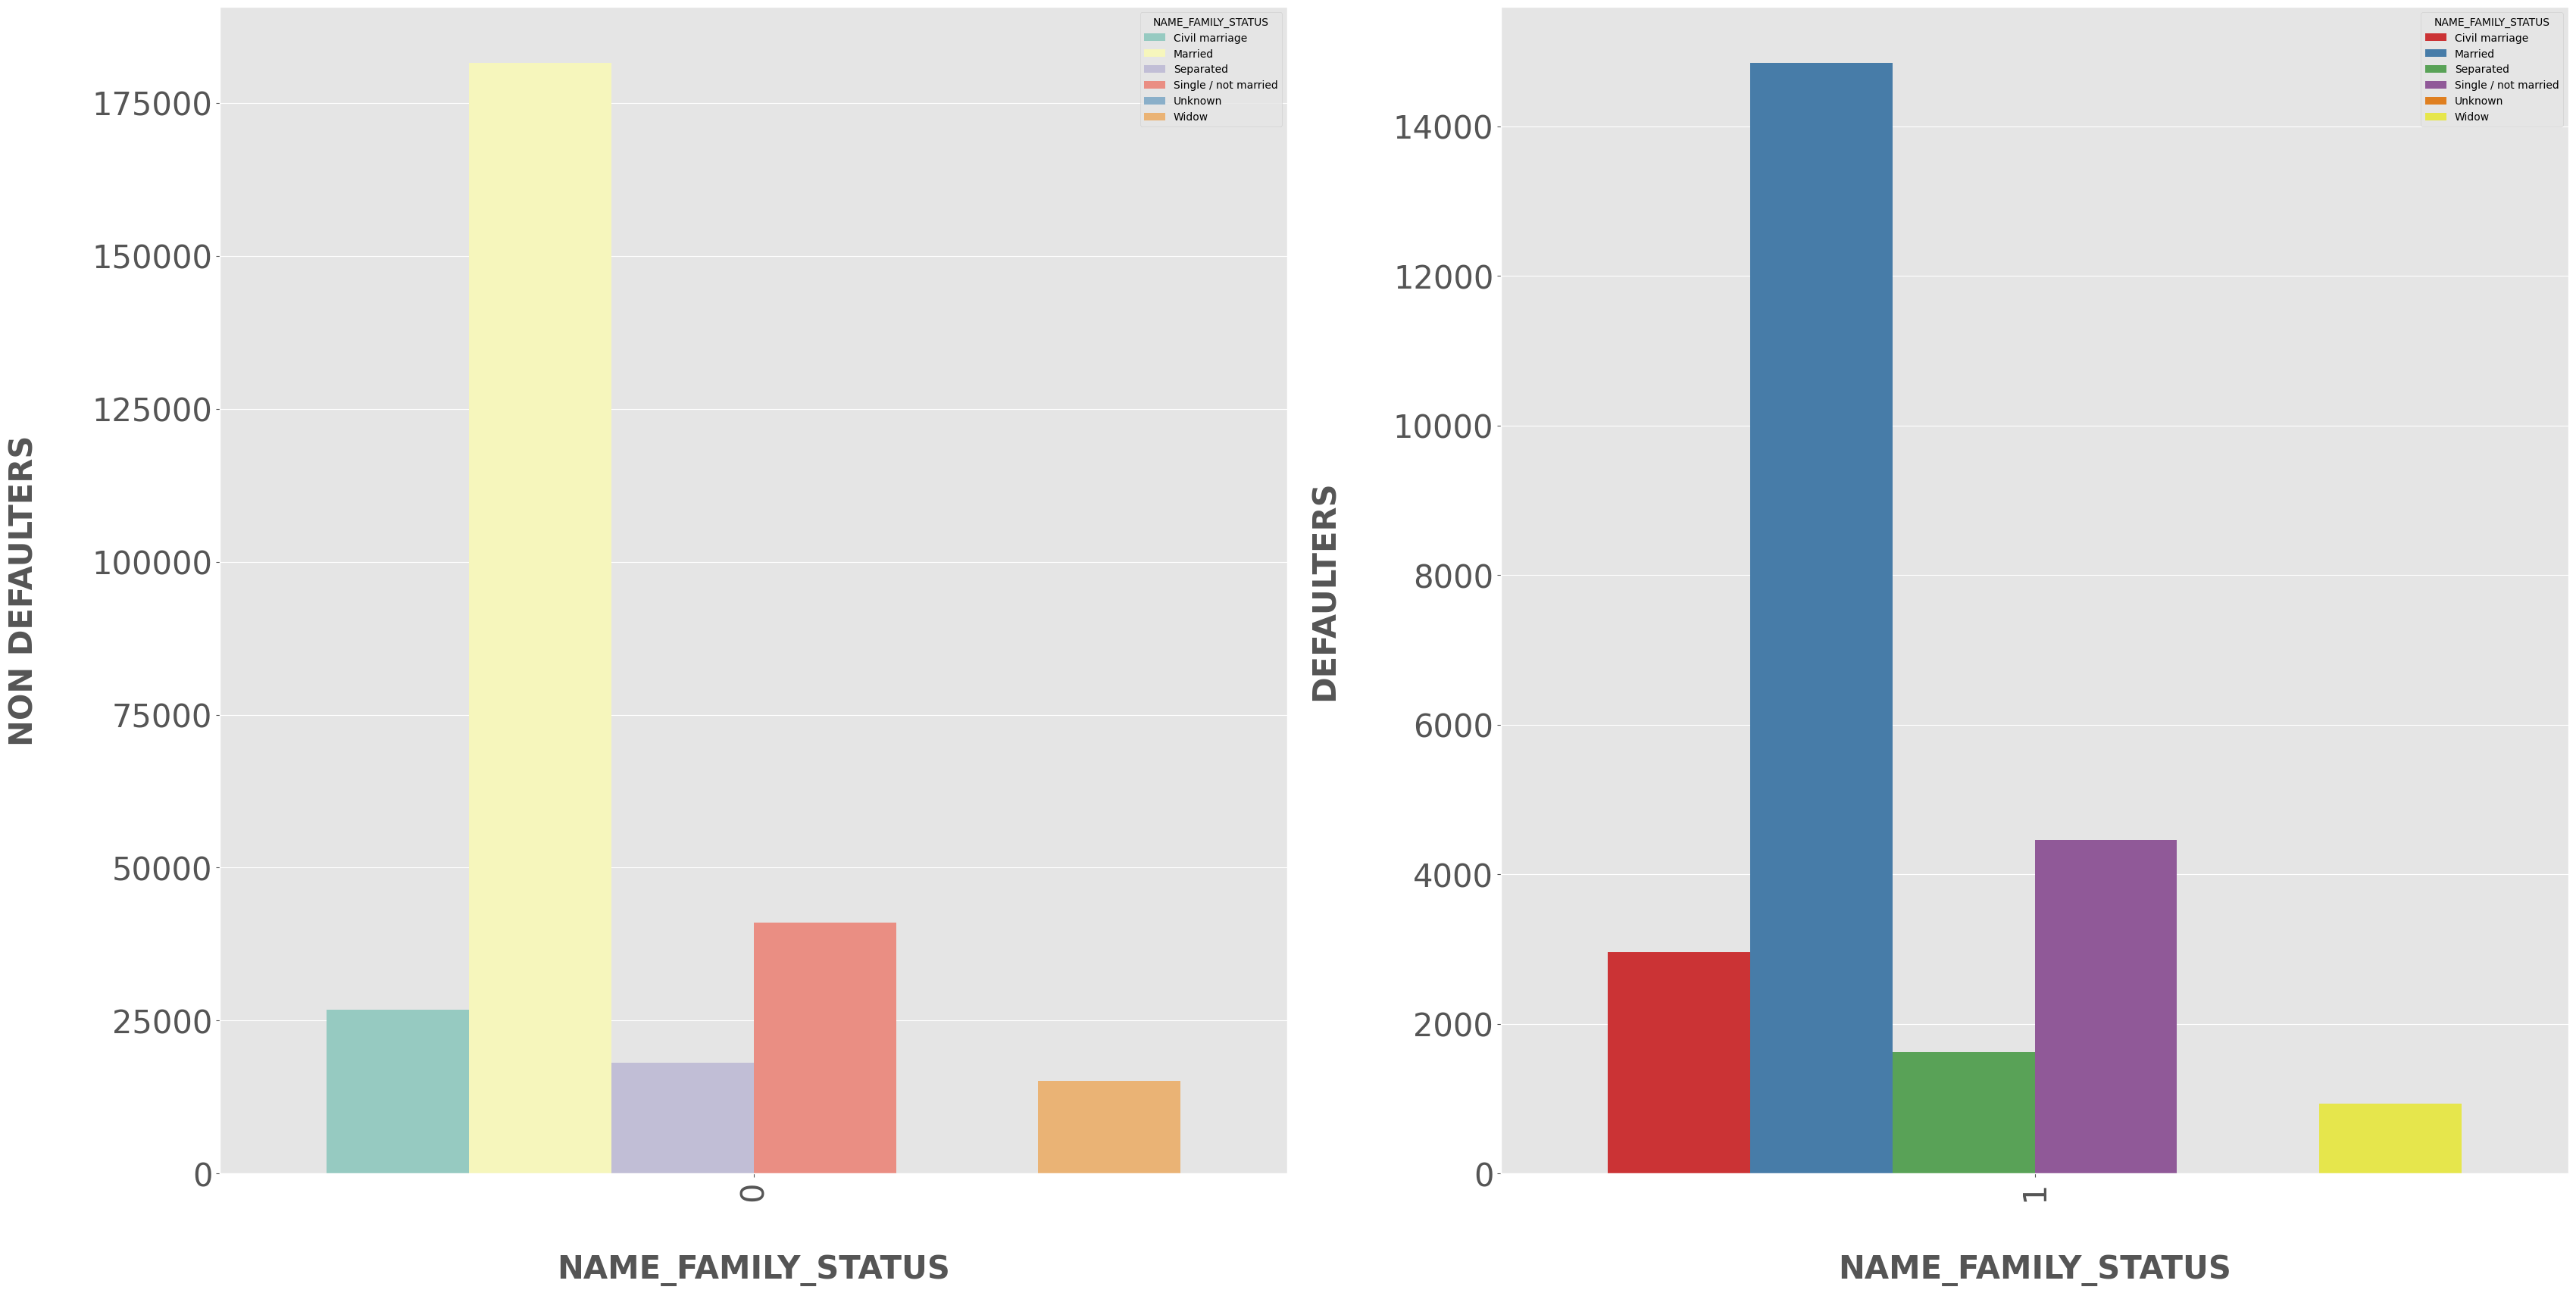

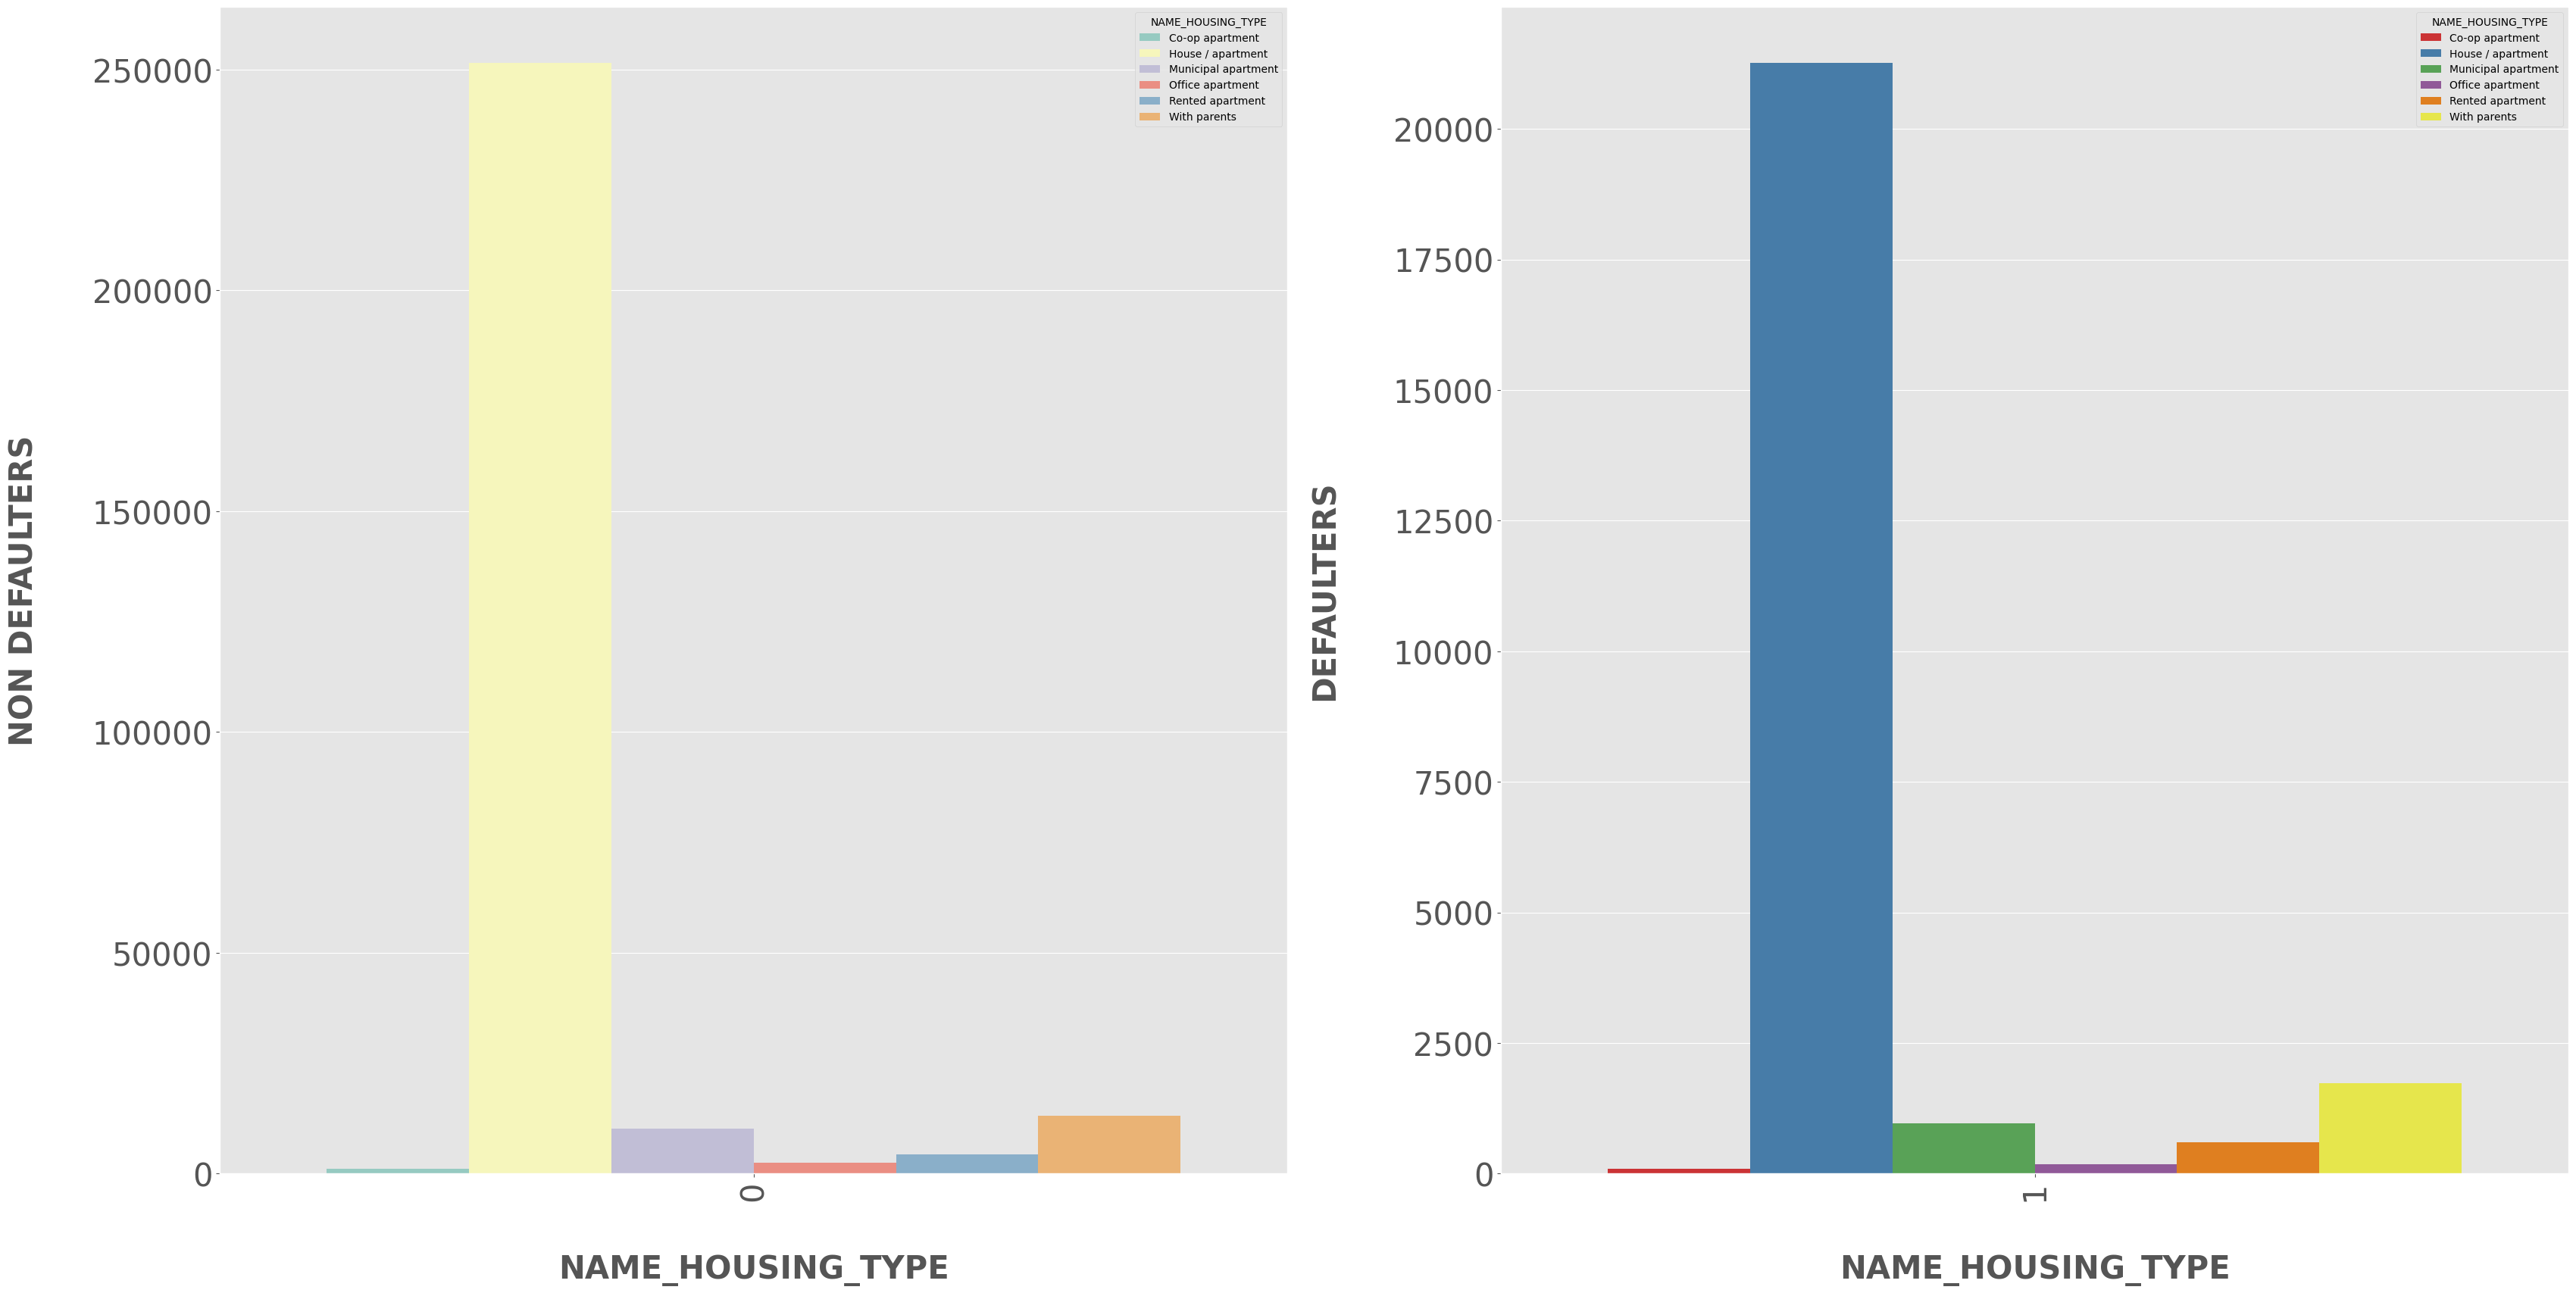

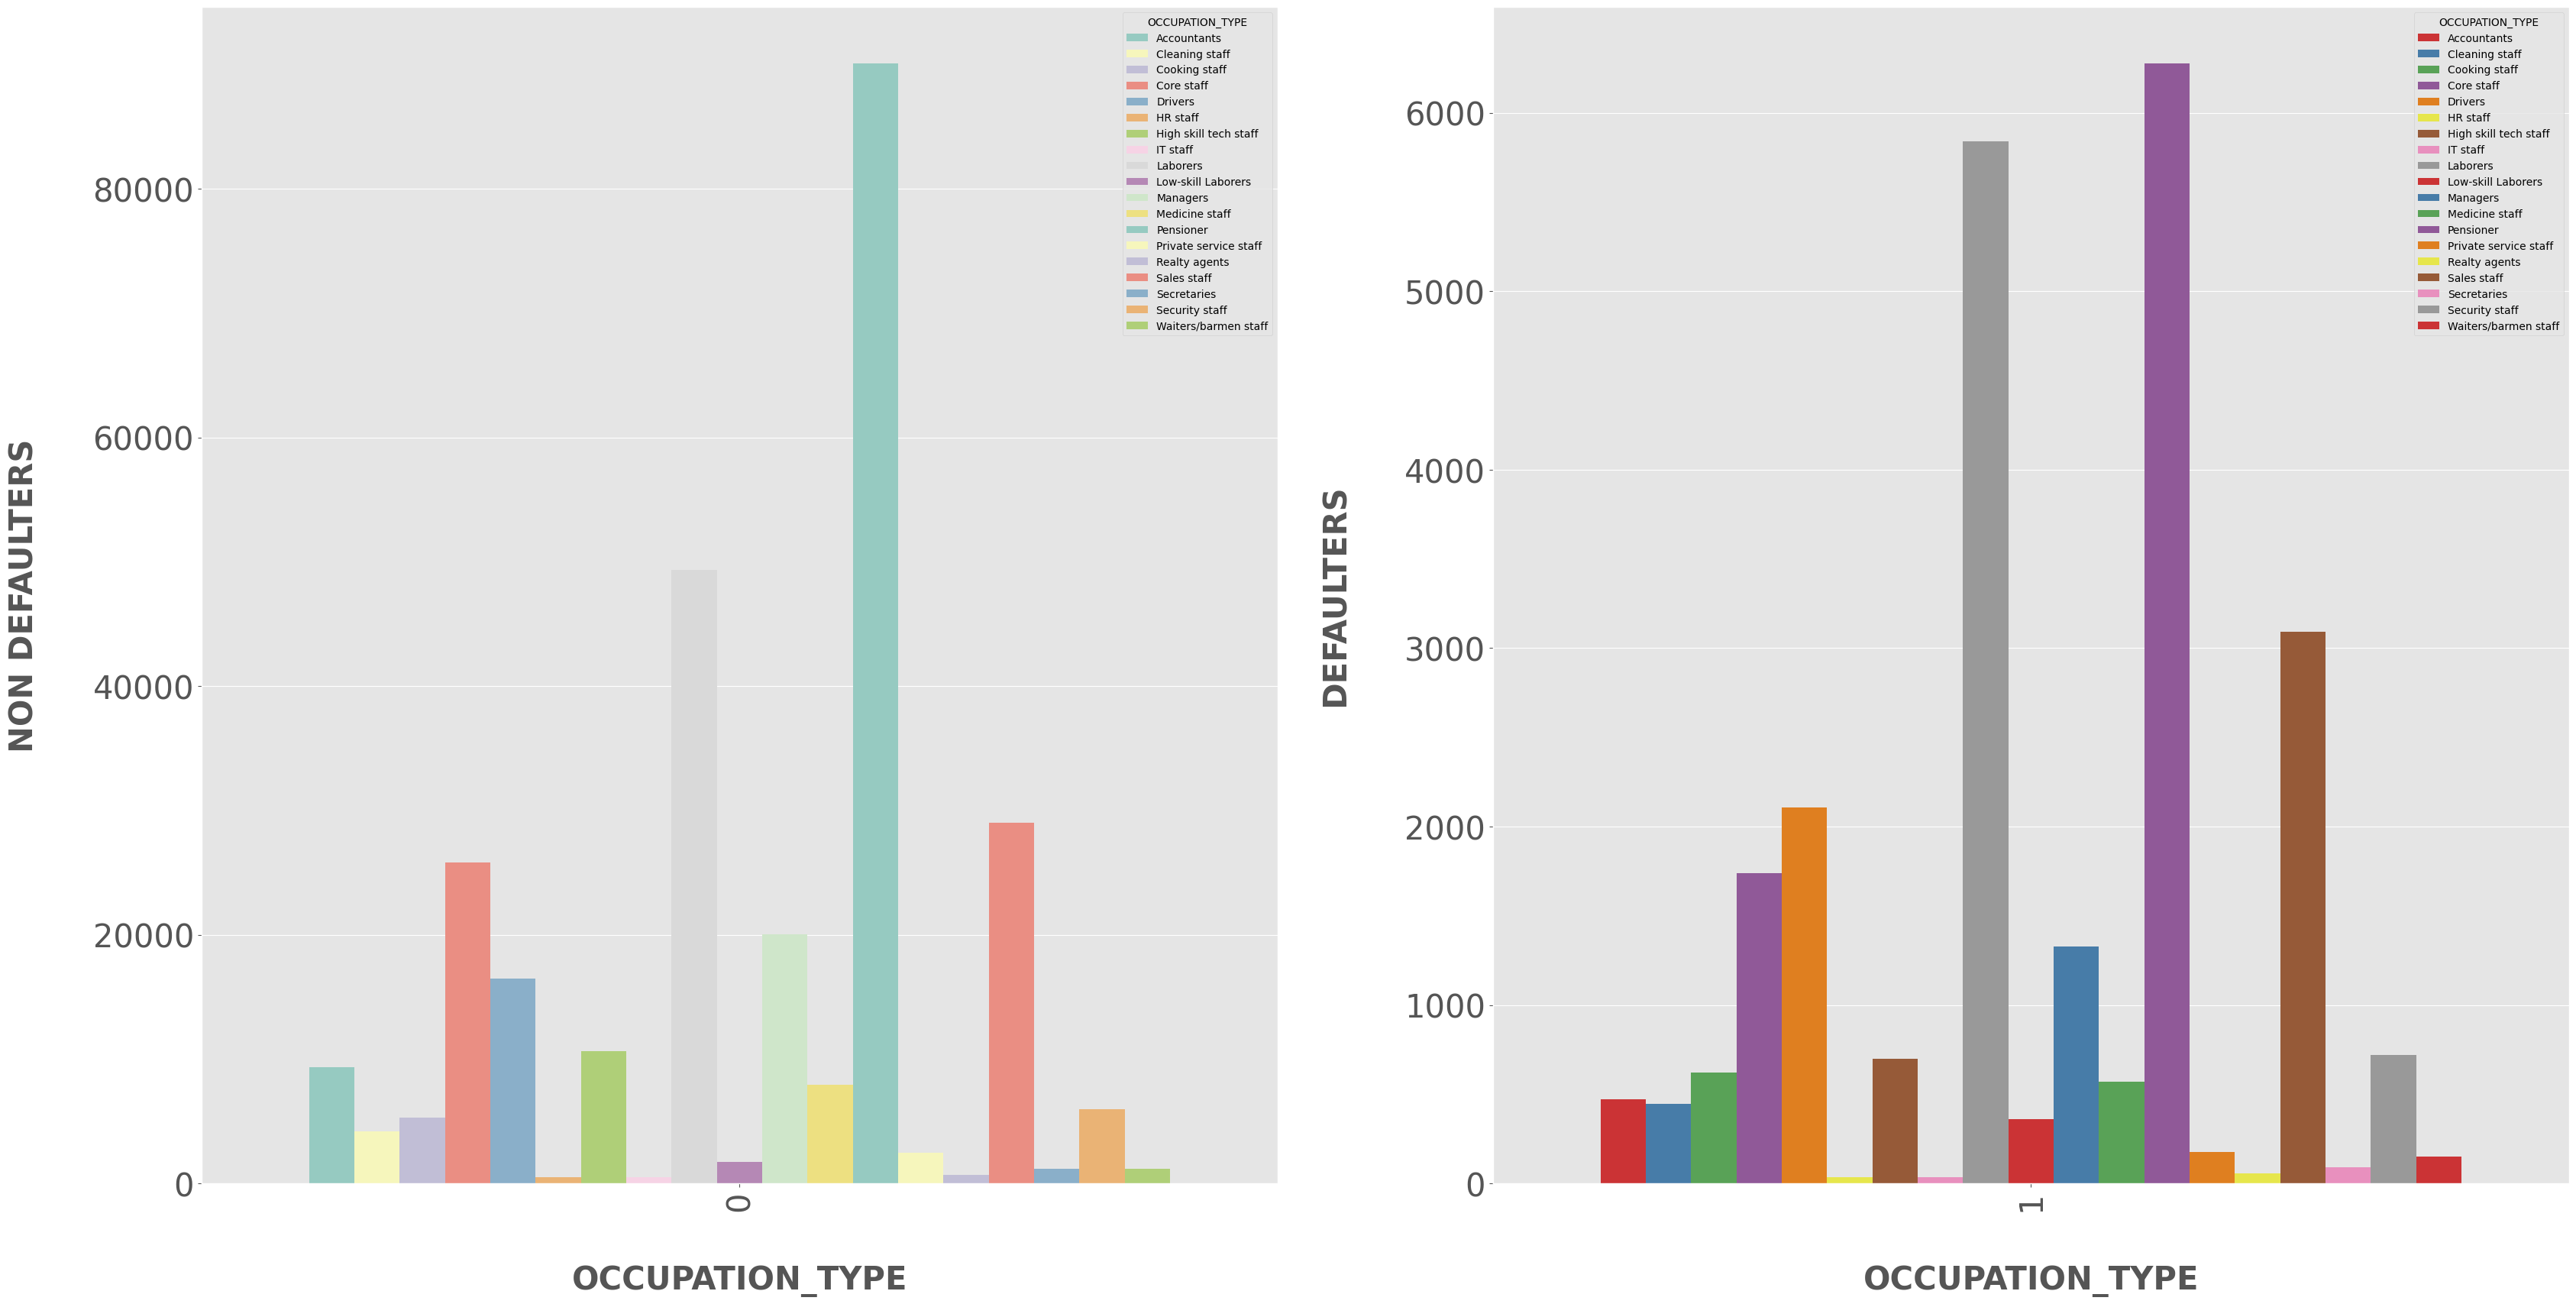

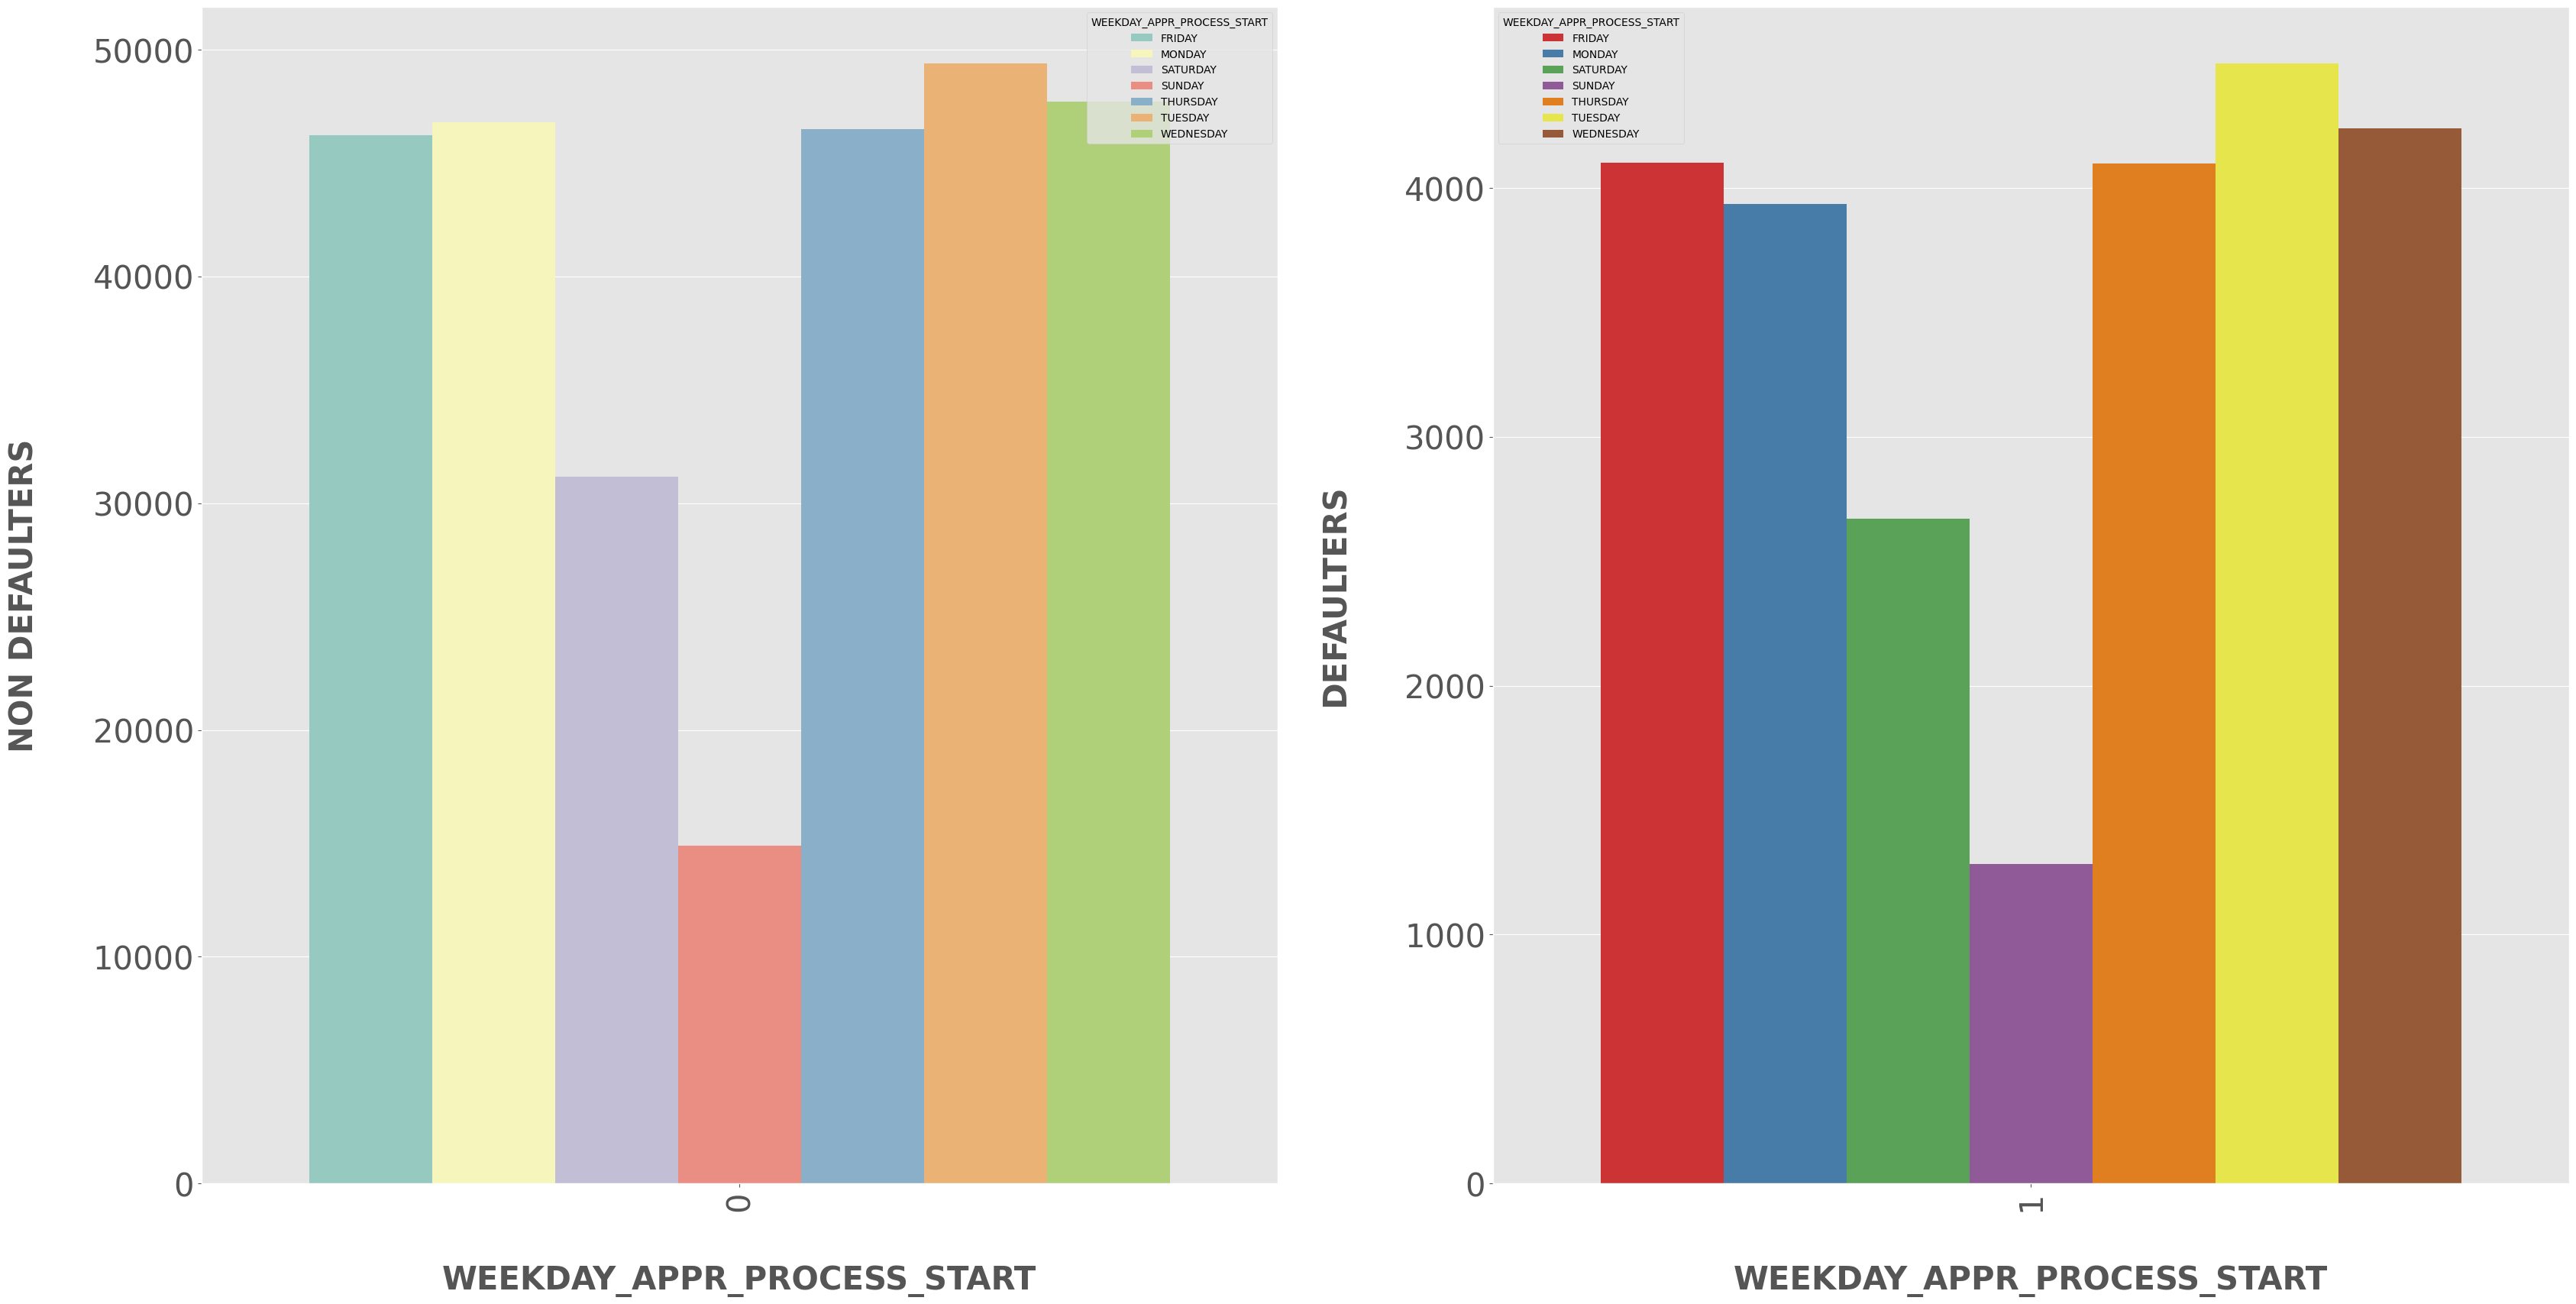

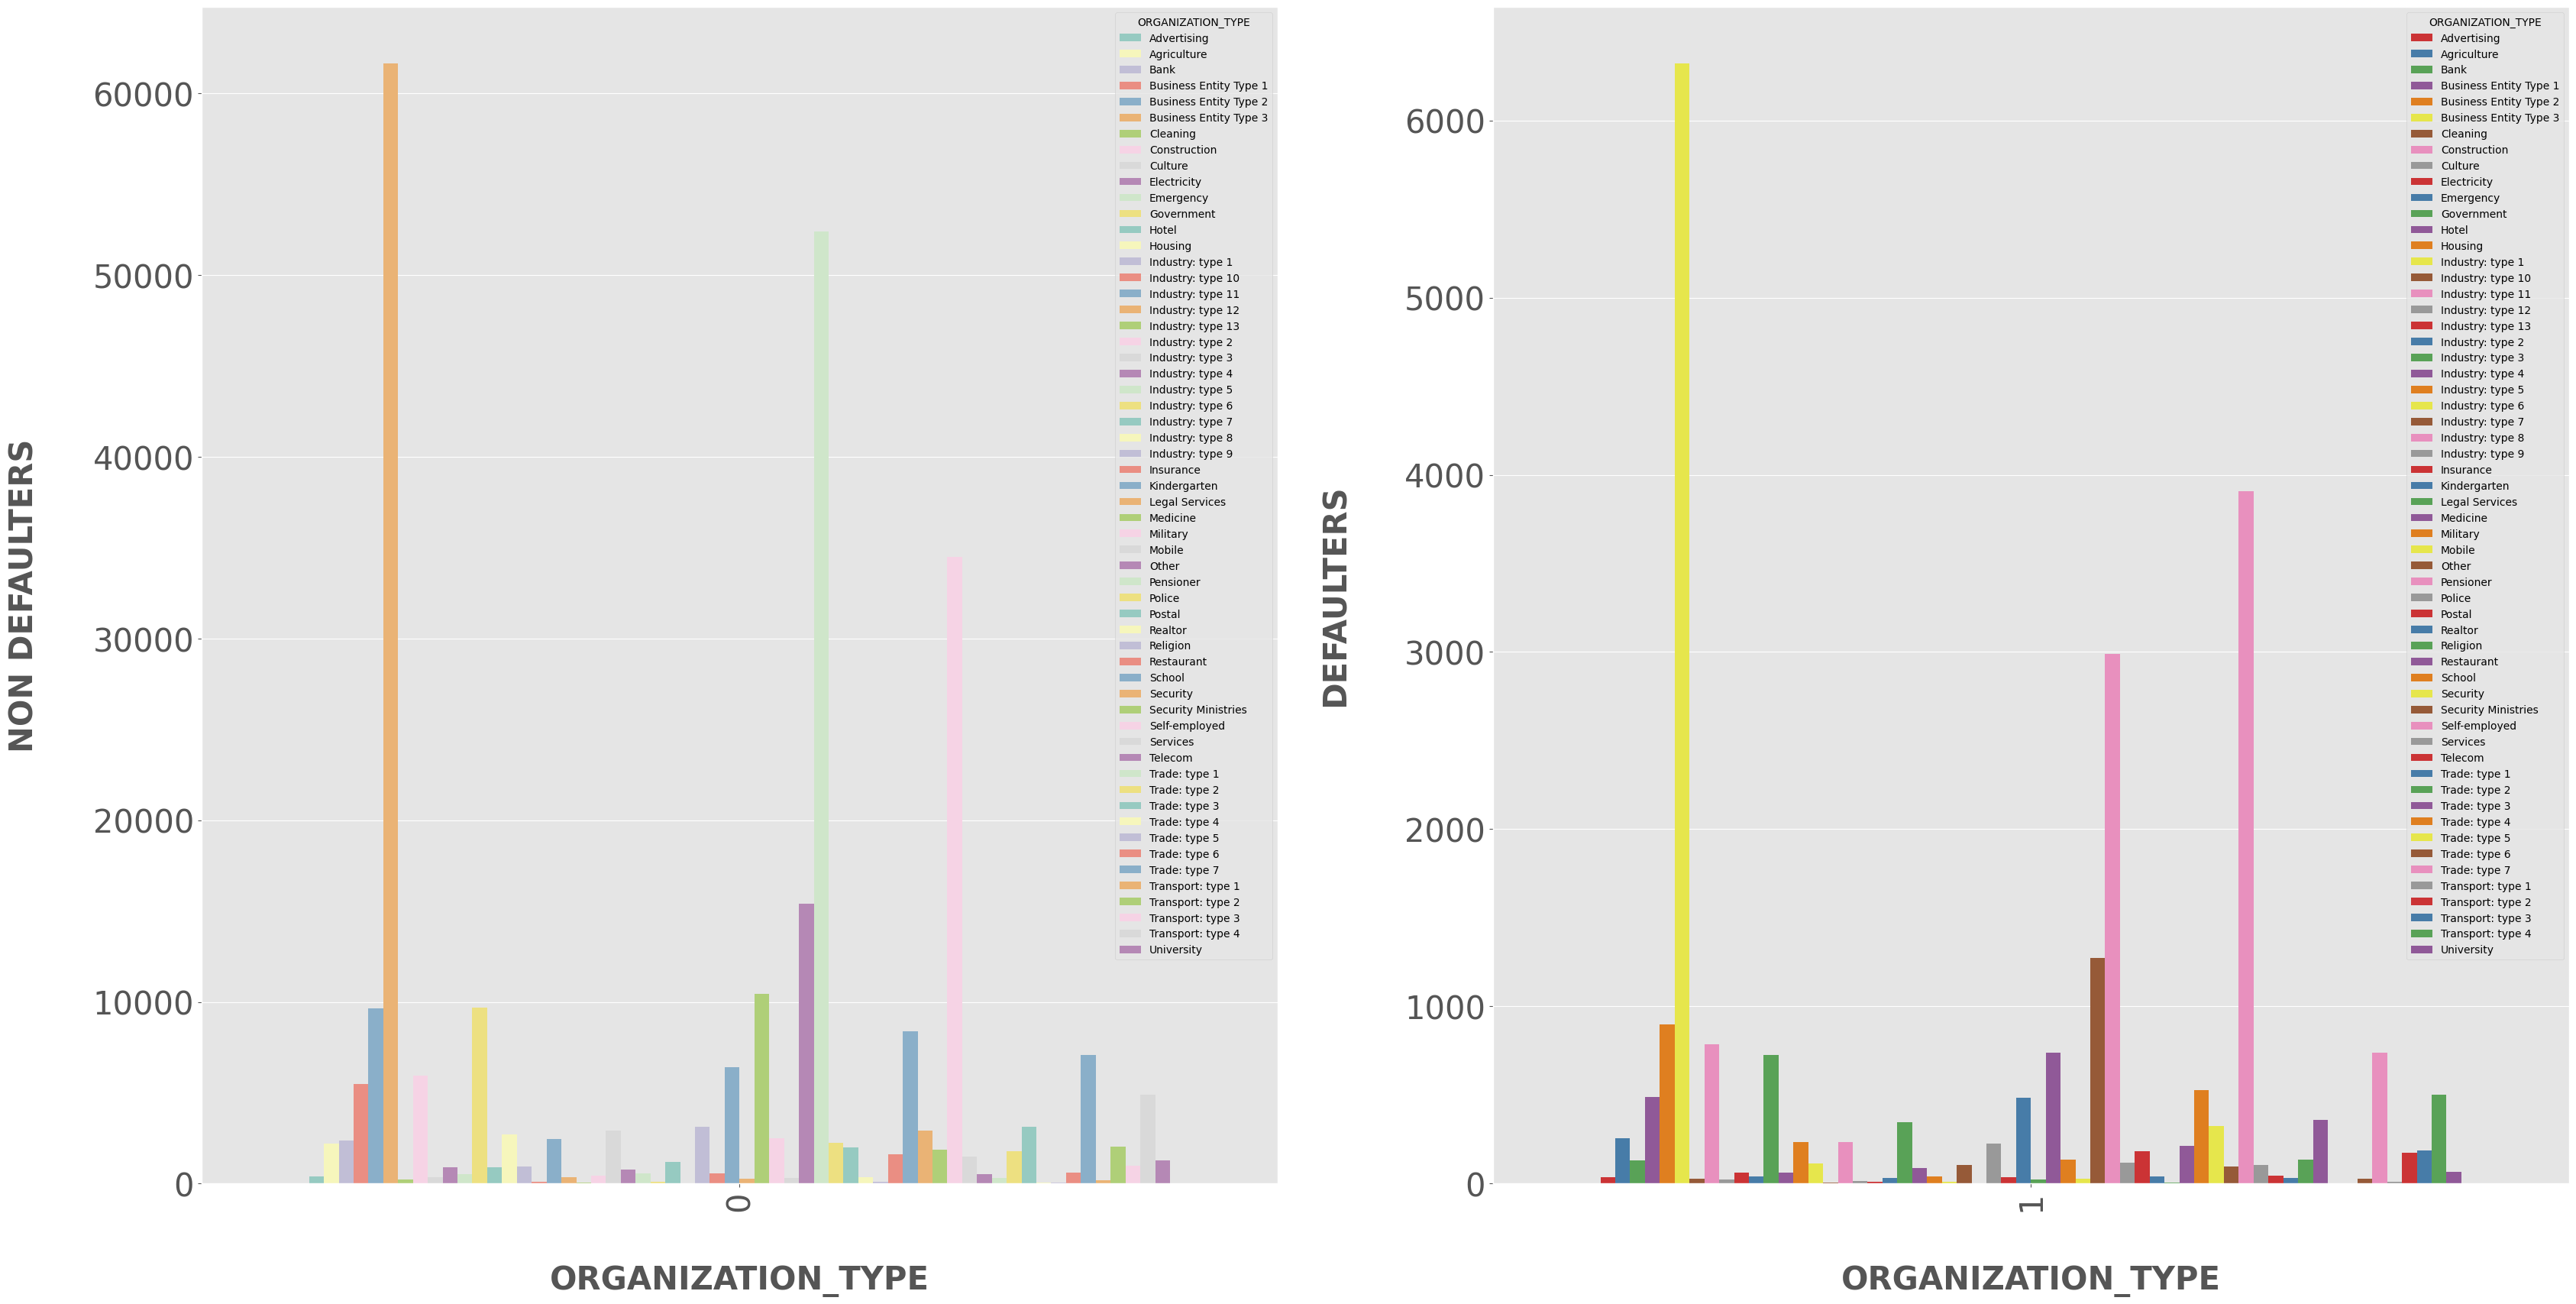

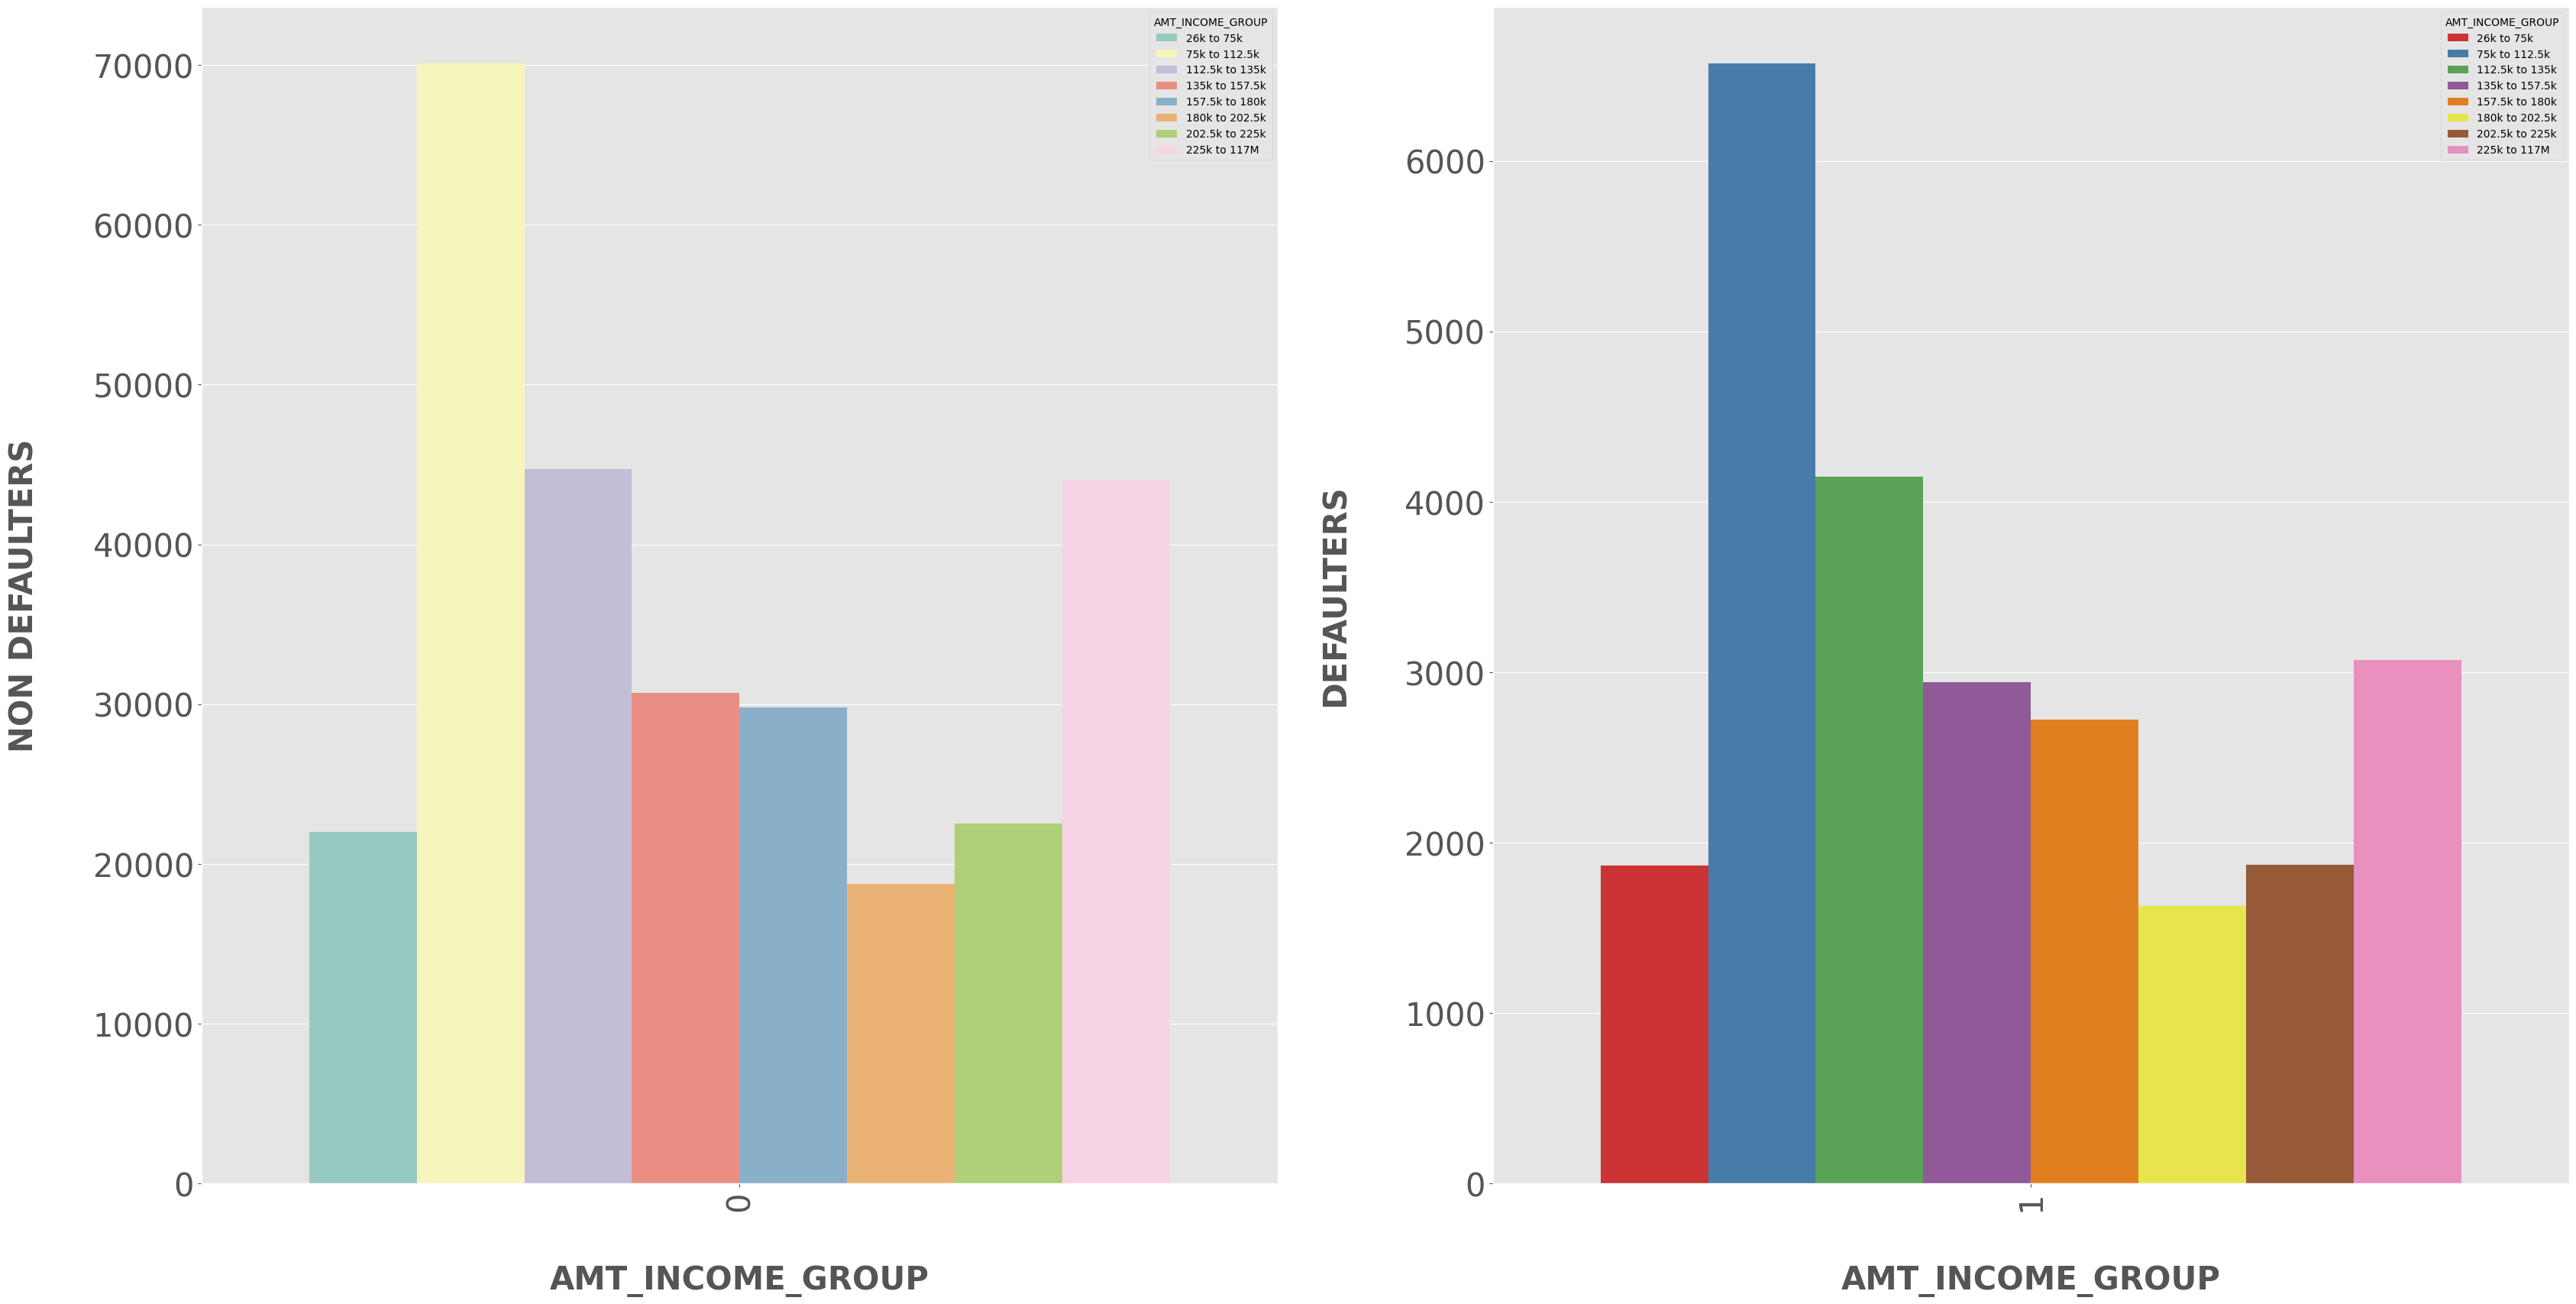

In [68]:
for col in categorical_col:
    categorical_plot(col)

OBSERVATIONS

NAME_CONTRACT_TYPE - Most client applied for Cash Loan, but client that obtained revolving loan are less likely to default.
NAME_TYPE_SUITE - Unaccompanied client applied for most loan and are most likely to default.
NAME_INCOME_TYPE - Working class income earners are the most applying for loans and they are most likely to default.
NAME_EDUCATION_TYPE - Those that have secondary/secondary special education applied for most loans followed by higher education clients. secondary/secondary special client are also most likely to default.
NAME_FAMILY_STATUS - Married people applied for most loan with highest likelihood of default.
NAME_HOUSING_TYPE - Comfortable clients with housing apartment applied for more loans than others and they also have the highest chance of default.
OCCUPATION_TYPE - Pensioners applied most for loans and are most likely to default.
WEEKDAY_APPR_PROCESS_START - The day of the week a loan process start is not conclusive to label a day as most defaulting day.
ORGANIZATION_TYPE - Clients working within Business Entity Type 3 applied for most loan and has the highest number of default.
AMT_INCOME_GROUP - Income earners between 75k to 112.5k applied for most loan and are most likely to default.





UNIVARIATE ANALYSIS - SELECTED NUMERICAL COLUMNS

In [69]:
def numerical_plot(col):
    sns.set(style="darkgrid")
    plt.figure(figsize=(40,20))
    
   
    plt.subplot(1,2,1)                                   
    sns.distplot(Target0[col], color="g" )
    plt.yscale('linear') 
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('NON DEFAULTERS', fontsize= 30, fontweight="bold")                  
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
     
    
    
    
    plt.subplot(1,2,2)                                                                                                      
    sns.distplot(Target1[col], color="r")
    plt.yscale('linear')    
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('DEFAULTERS', fontsize= 30, fontweight="bold")                     
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    
    plt.show();

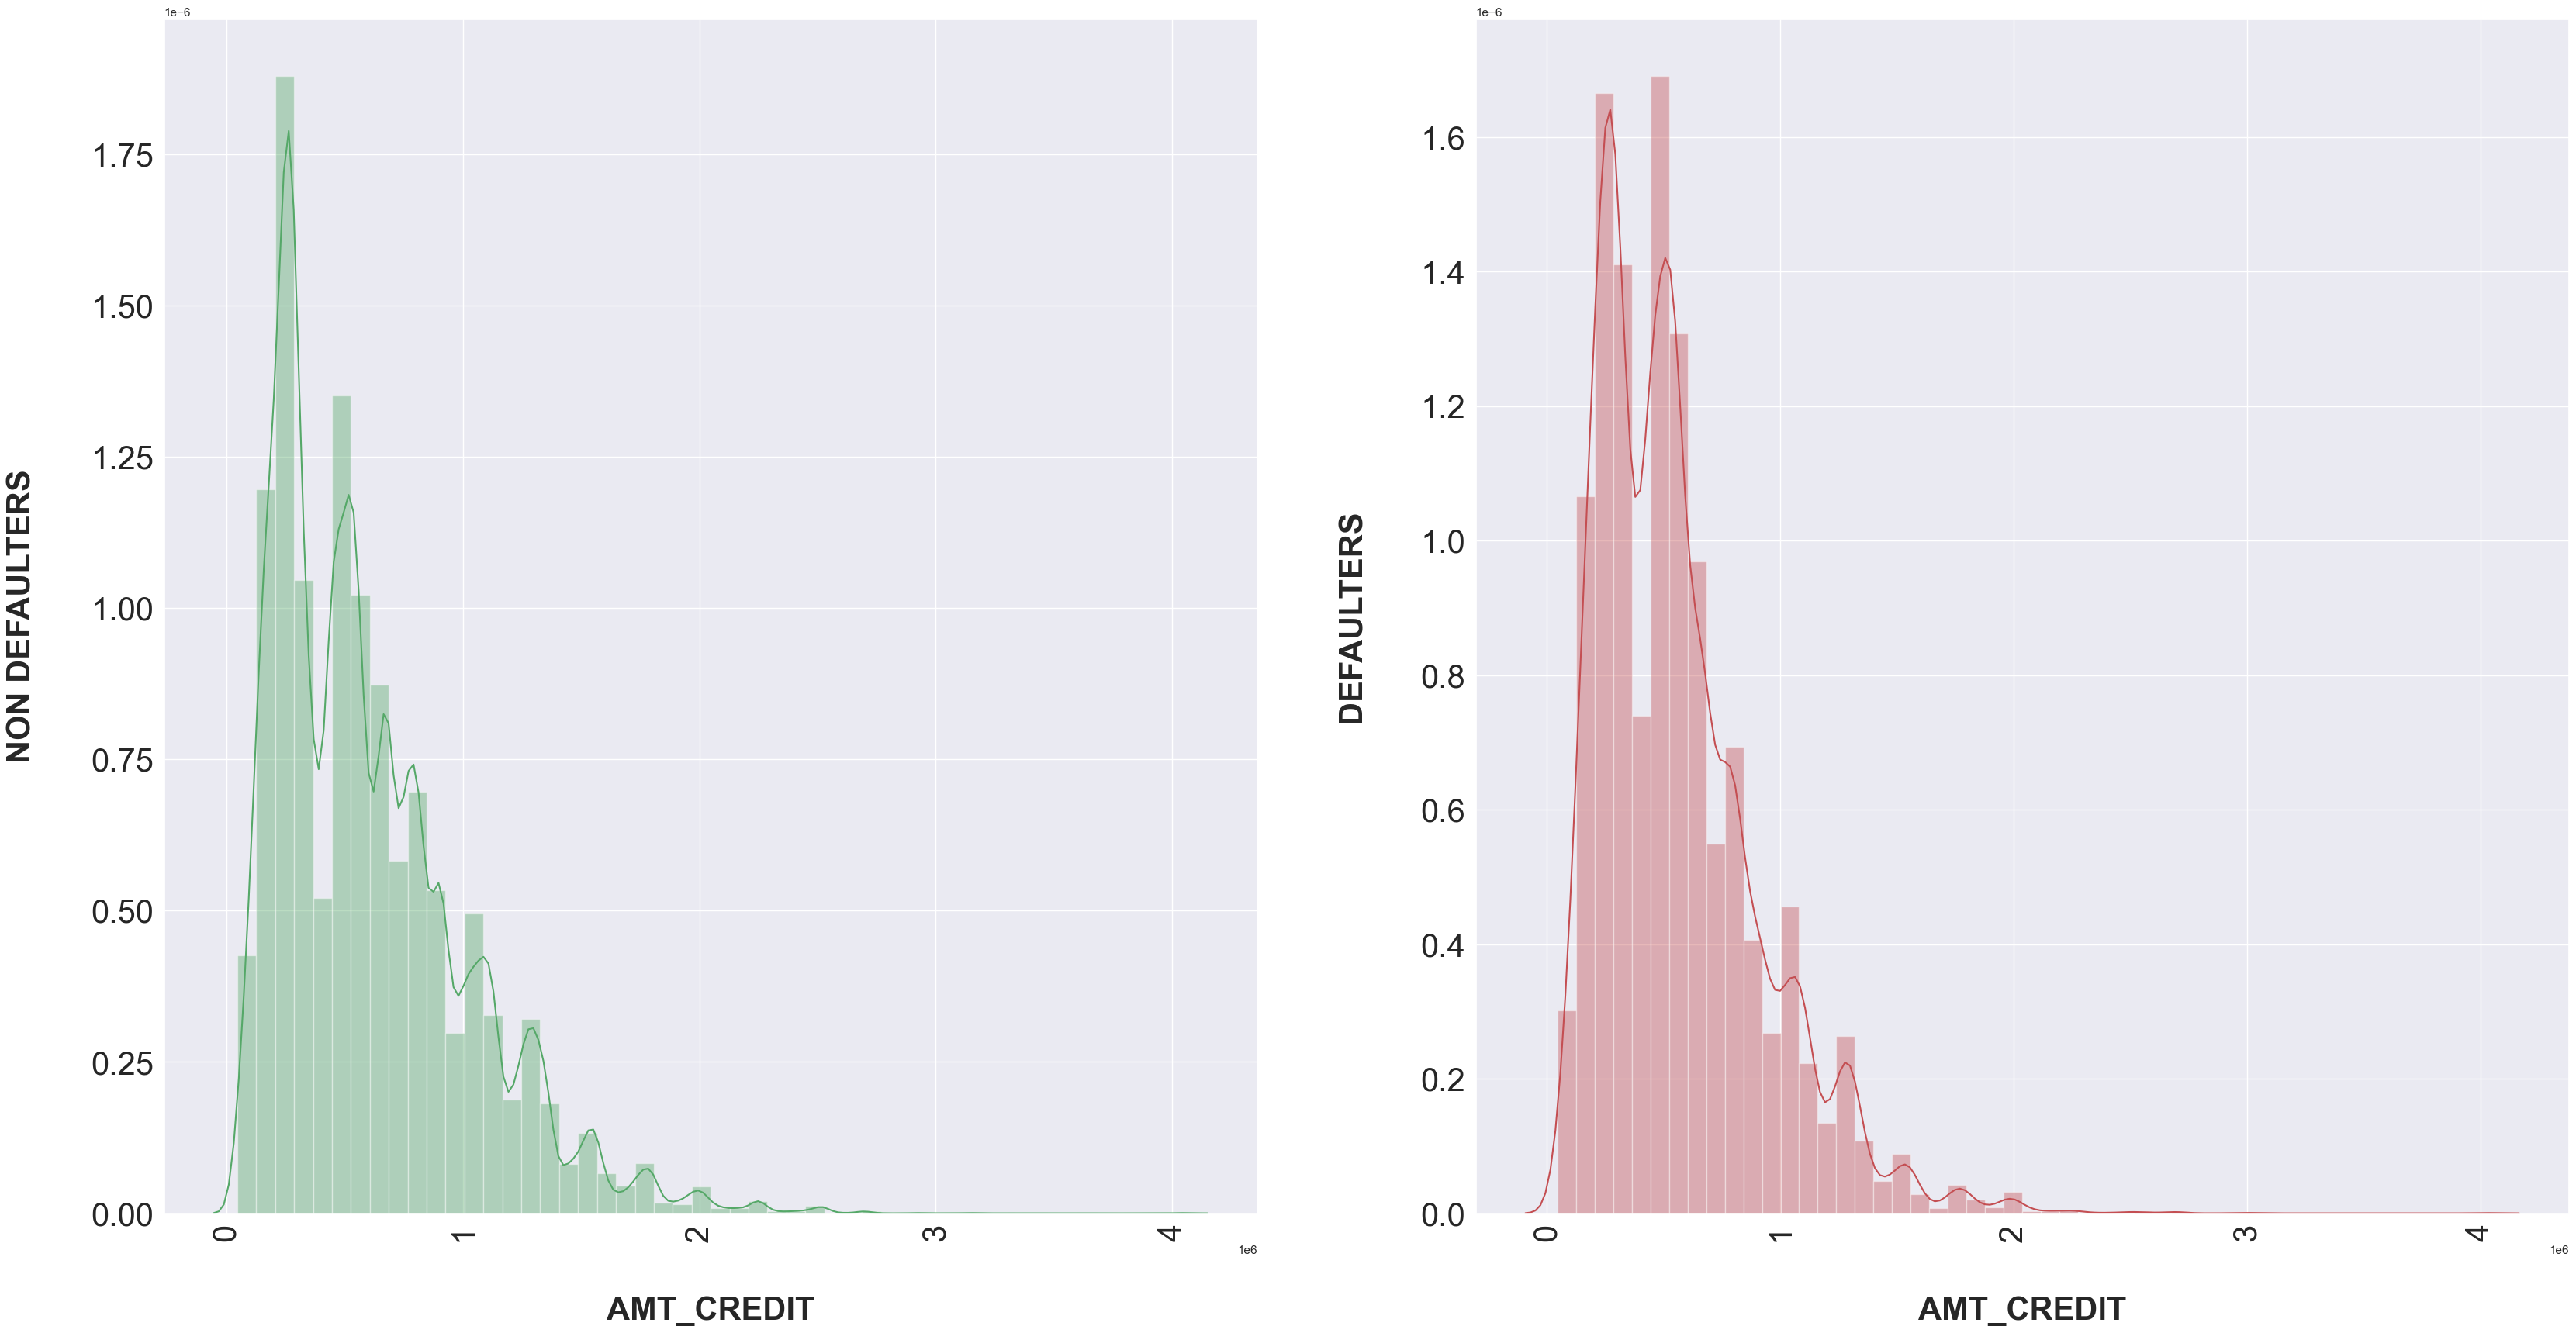

In [70]:
numerical_plot(col='AMT_CREDIT')

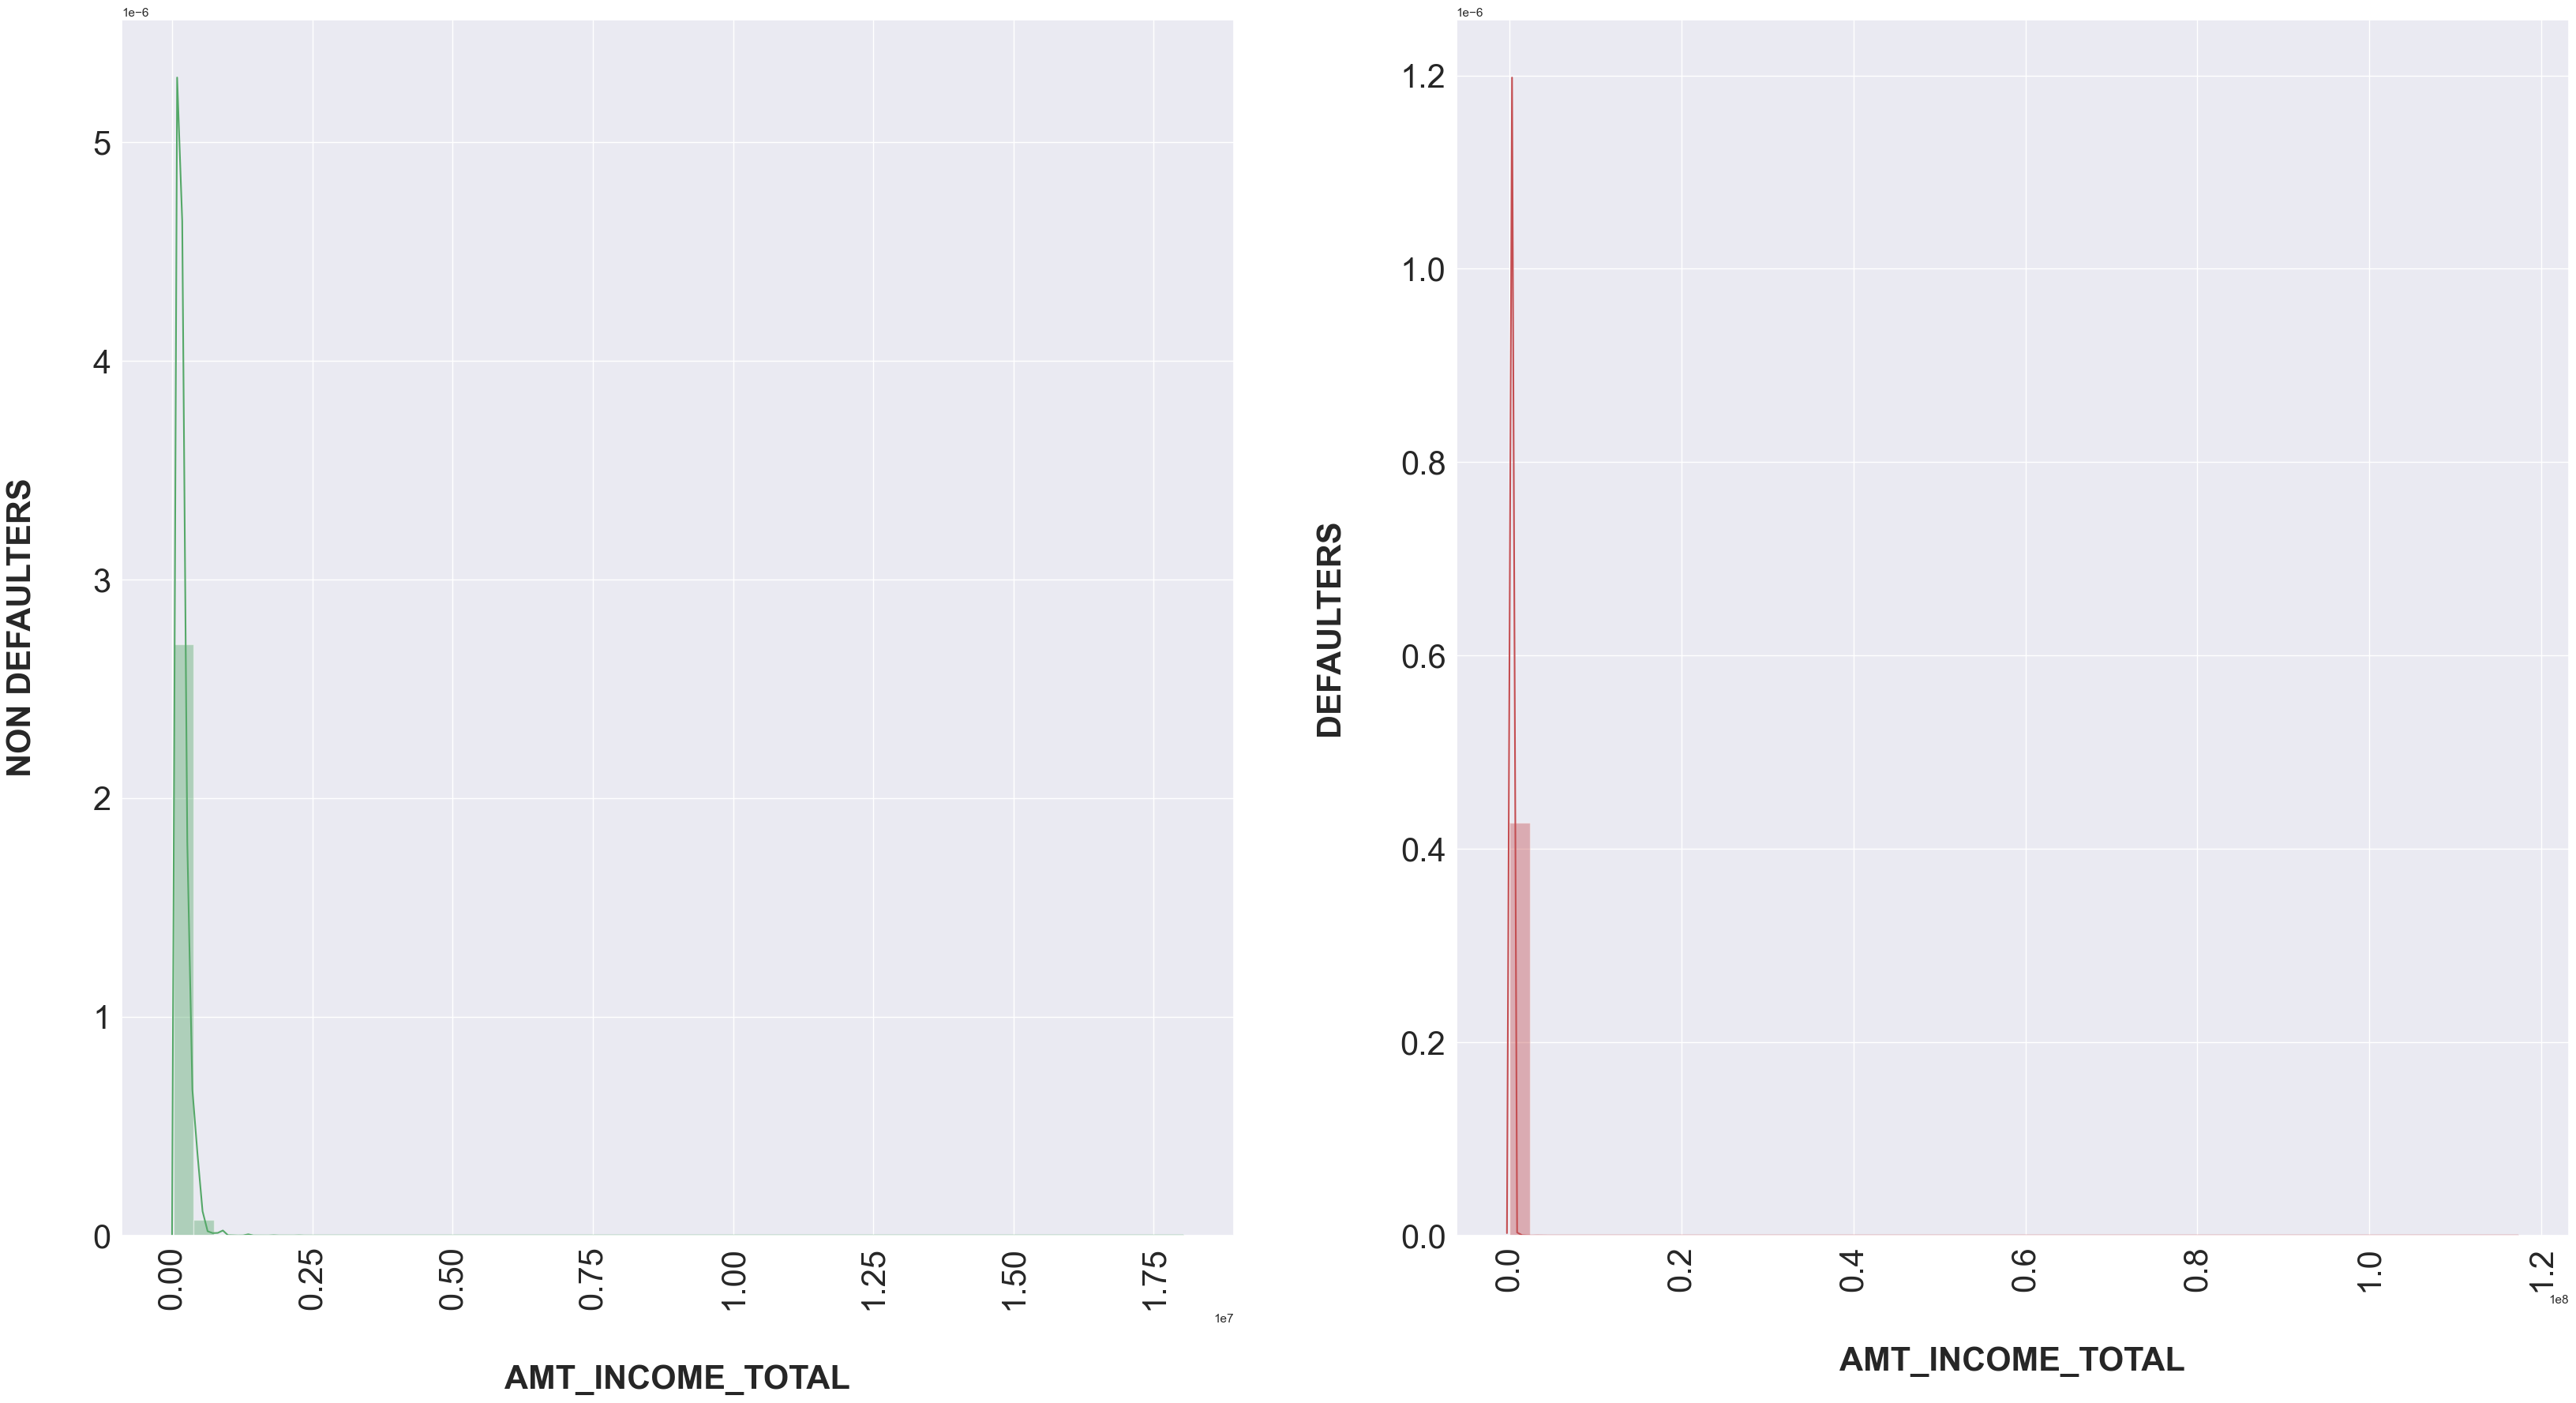

In [71]:
numerical_plot('AMT_INCOME_TOTAL')

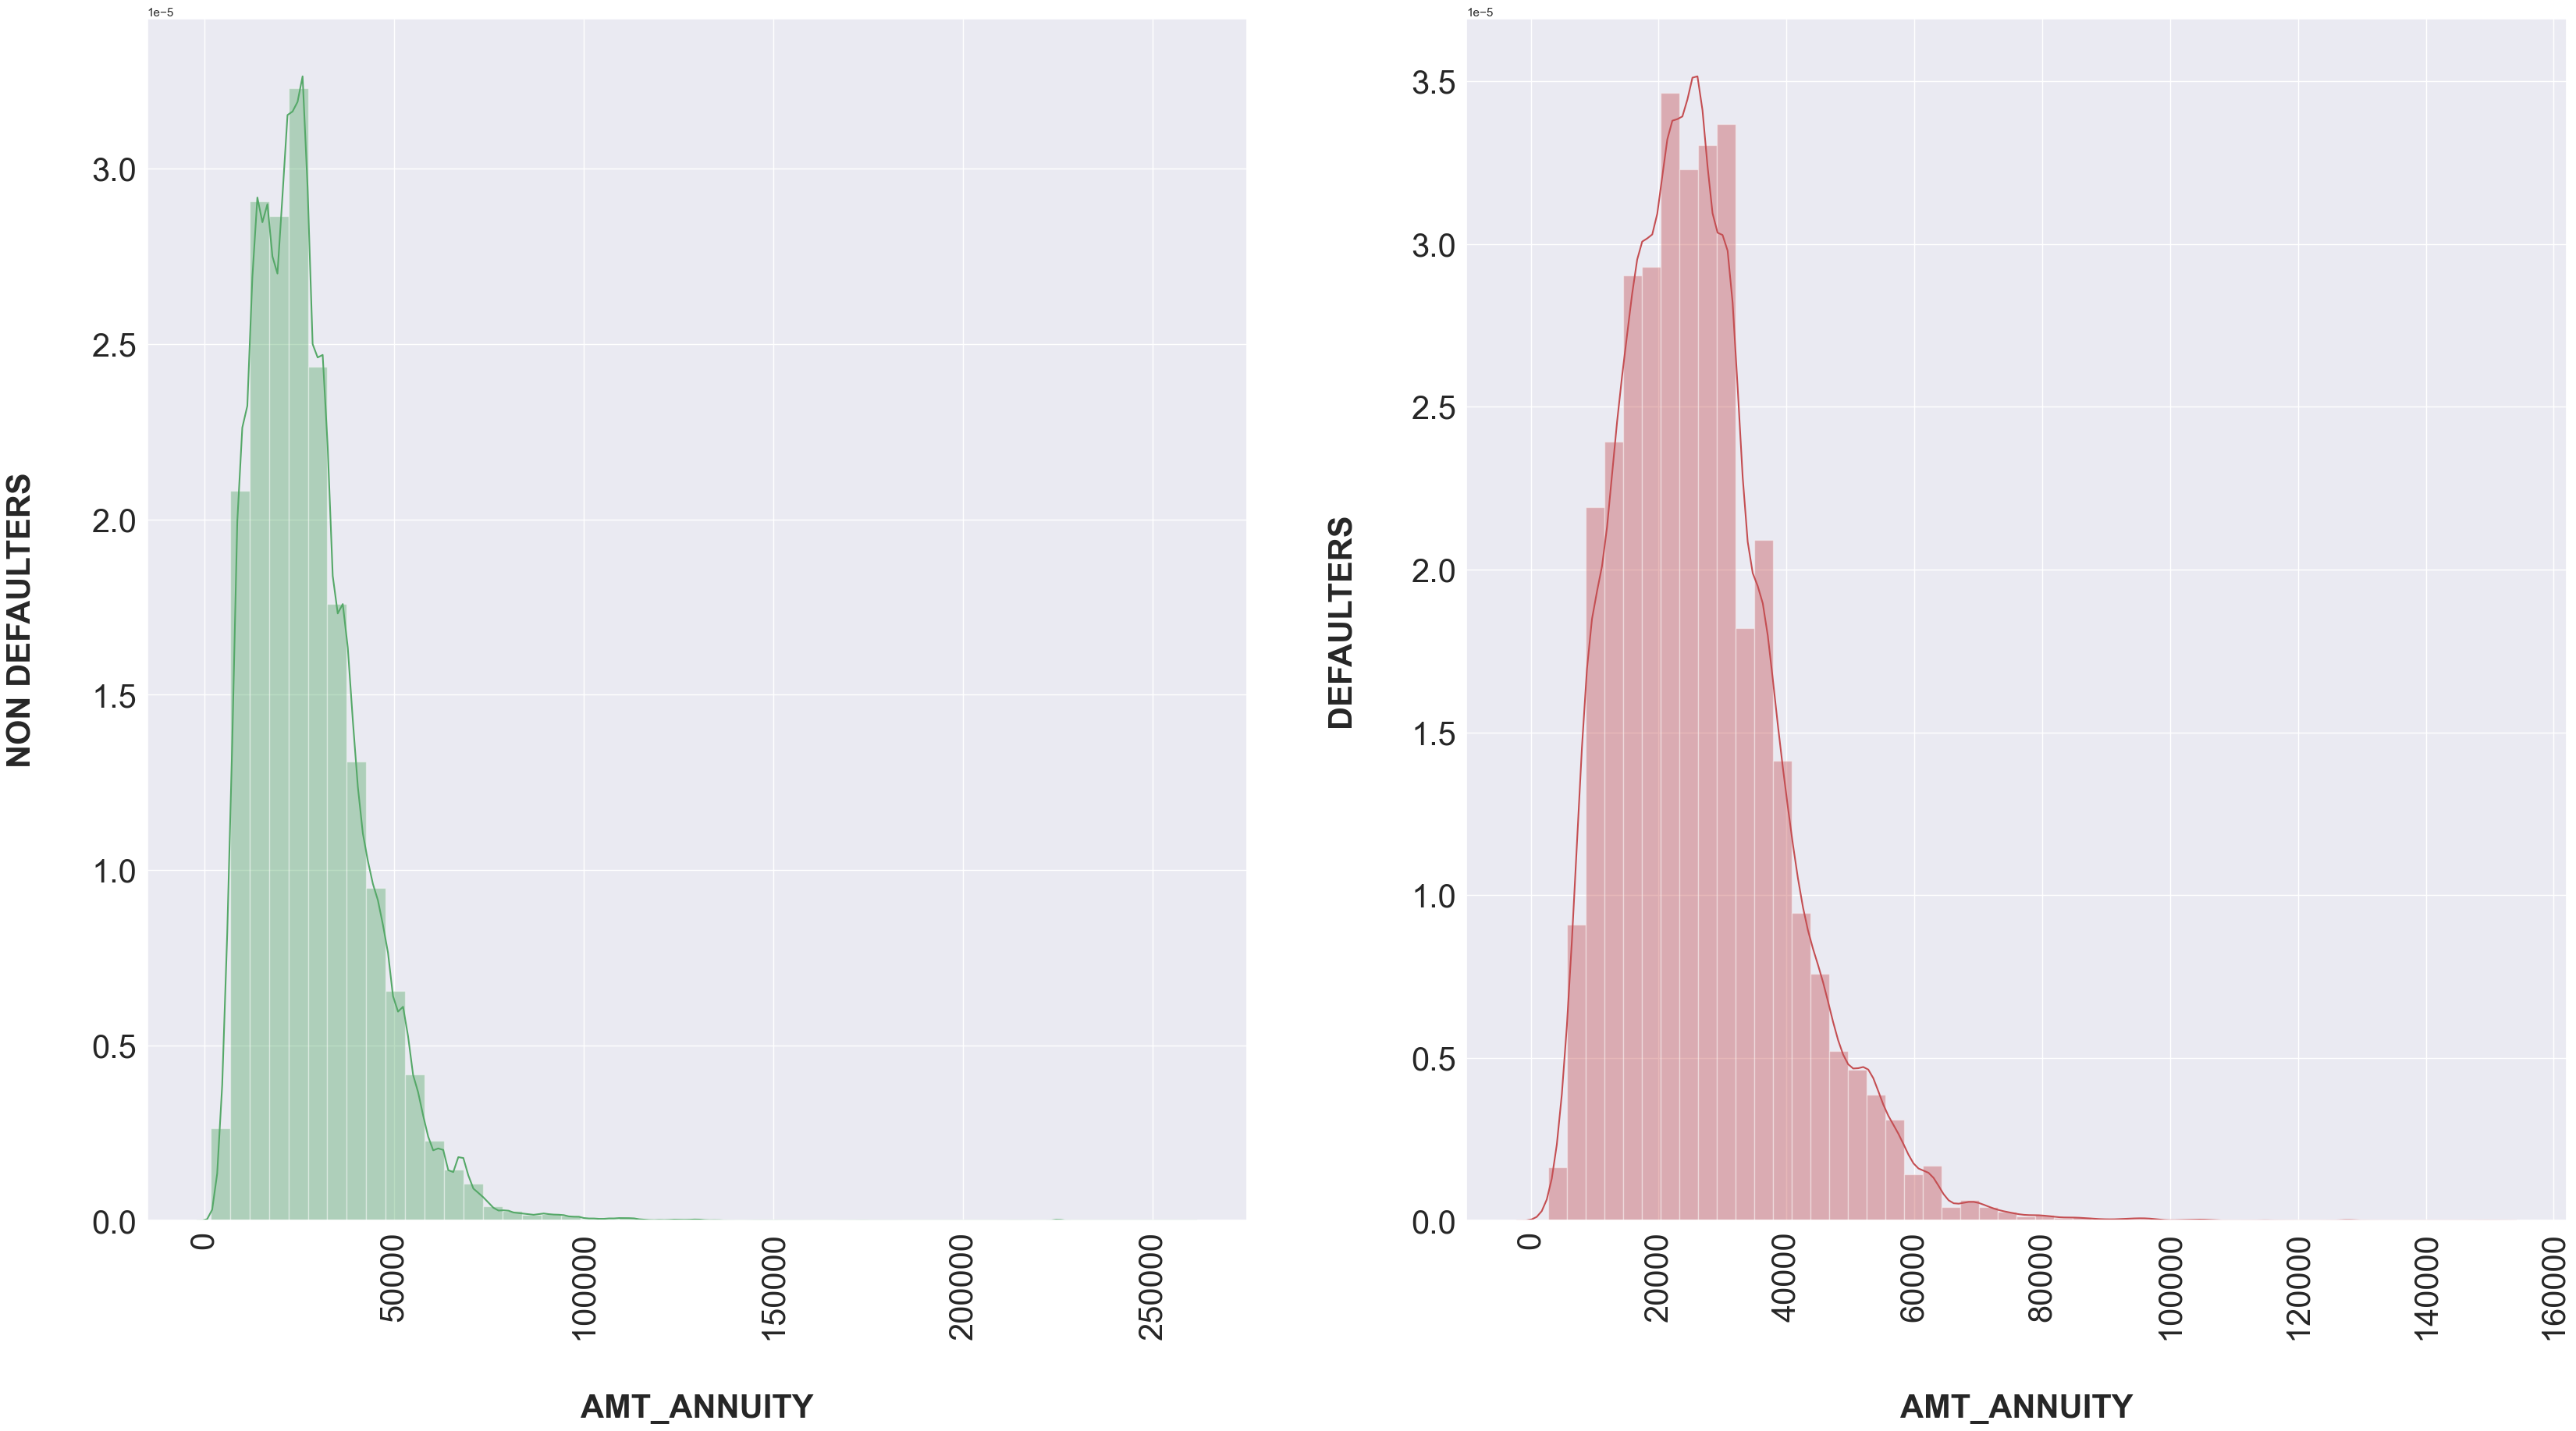

In [72]:
numerical_plot('AMT_ANNUITY')

OBSERVATIONS

Dist Plot shows that Annuity is the closest feature to been normally distributed. Hence, the data will require more standardization to further reveal insights.

Client with target one has largely staggered income as compared to target zero. Dist. plot clearly shows that the shape in Income total, Annuity and Credit is similar for Target 0 and similar for Target 1.

The plots are also highlighting that people who have difficulty in paying back loans with respect to their income, loan amount, price of goods against which loan is procured and Annuity.

BIVARIATE ANALYSIS

In [73]:
app_df[["TARGET","AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS"]]

TARGET  AMT_INCOME_TOTAL            NAME_EDUCATION_TYPE  \
0            1          202500.0  Secondary / secondary special   
1            0          270000.0               Higher education   
2            0           67500.0  Secondary / secondary special   
3            0          135000.0  Secondary / secondary special   
4            0          121500.0  Secondary / secondary special   
...        ...               ...                            ...   
307506       0          157500.0  Secondary / secondary special   
307507       0           72000.0  Secondary / secondary special   
307508       0          153000.0               Higher education   
307509       1          171000.0  Secondary / secondary special   
307510       0          157500.0               Higher education   

          NAME_FAMILY_STATUS  
0       Single / not married  
1                    Married  
2       Single / not married  
3             Civil marriage  
4       Single / not married  
...                      ...  
307506             Separated  
307507                 Widow  
307508             Separated  
307509               Married  
307510               Married  

[307511 rows x 4 columns]

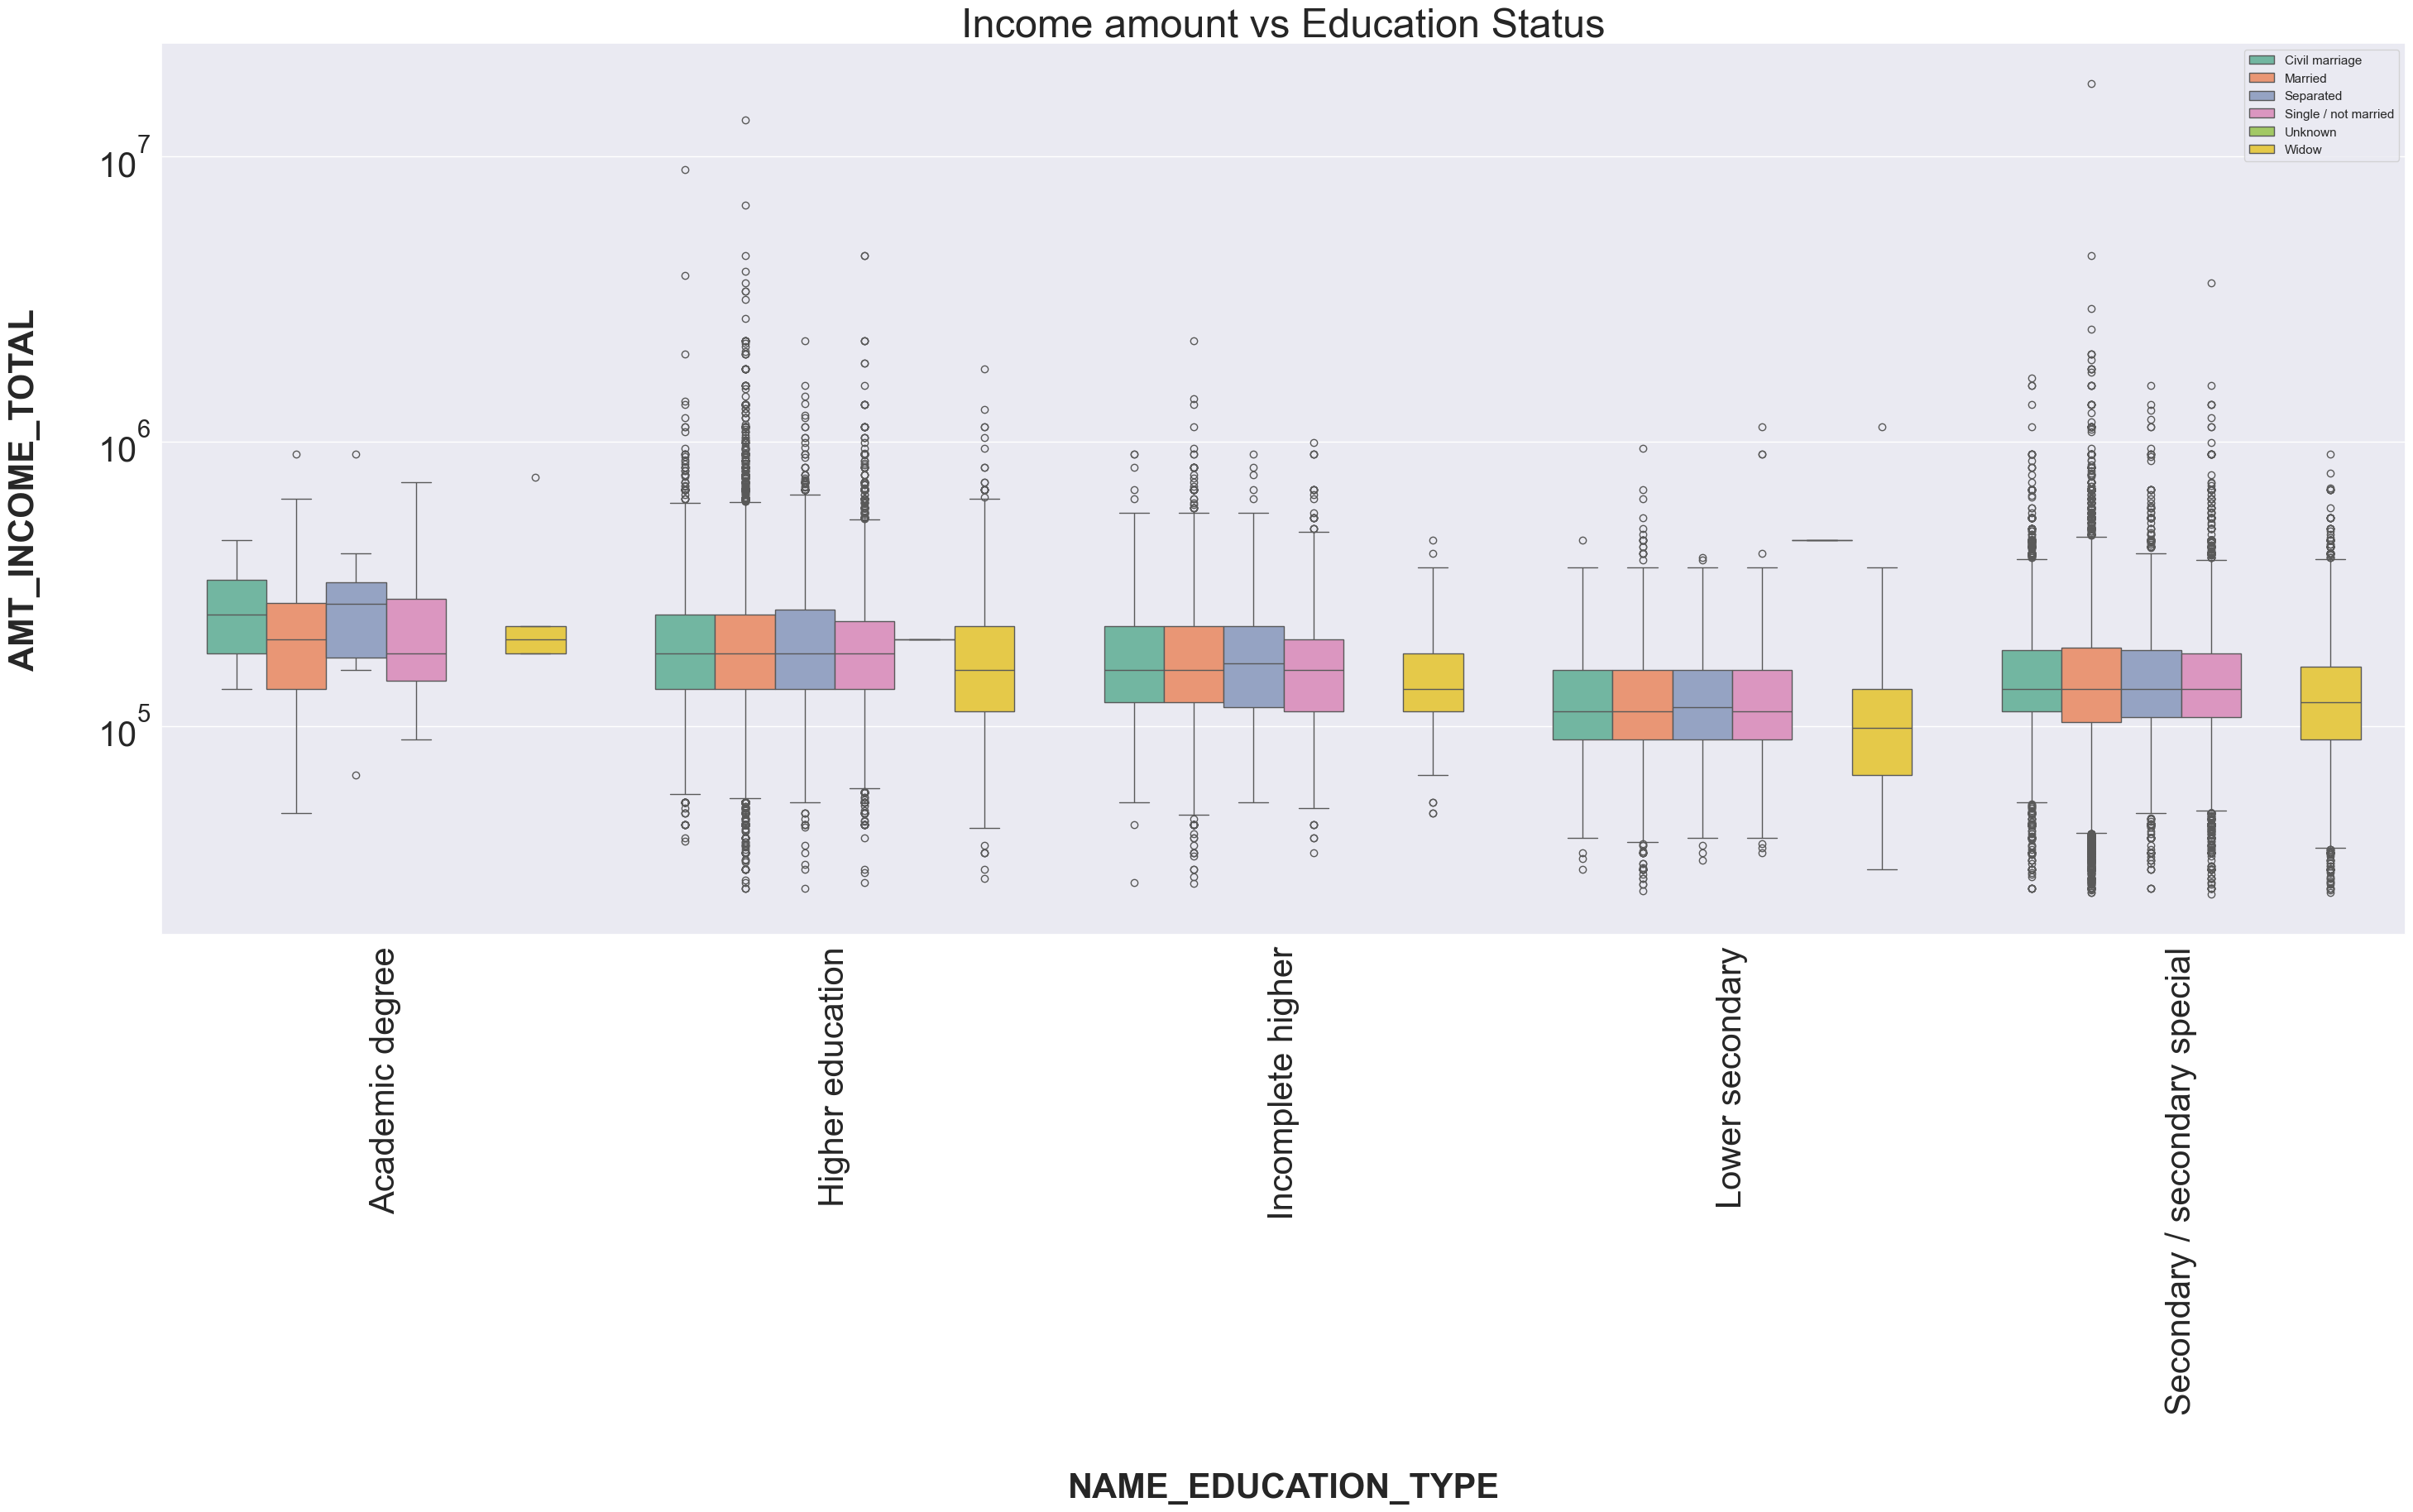

In [74]:
#NAME_EDUCATION_TYPE VS AMT_INCOME_TOTAL VS NAME_FAMILY_STATUS

#As the values are too large, it is better to use log for better analysis
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     
plt.xticks(rotation = 90)

#Boxplot w.r.t Data Target 0
sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')

#Adjusting legend position
plt.legend( loc = 'upper right')                                             
plt.title('Income amount vs Education Status',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

OBSERVATIONS

Widow Client with Academic degree have less noticeable outliers and doesn’t have First and Third quartile. Also, Clients with all types of family statuses having academic degrees have very less outliers as compared to other types of education.

Income of the clients with all types of family status having rest of the education type lie Below the First quartile i.e. 25%
Clients having Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special have a higher number of outliers.

From the above figure, we can say that some of the clients having Higher Education tend to have the highest income compared to others.
Though some of the clients who haven’t completed their Higher Education tend to have higher incomes.

Some of the clients having Secondary/Secondary Special Education tend to have higher incomes.

    RE-CONFIRMING DATASET AFTER BINNING

In [75]:
app_df.shape

(307511, 74)

In [76]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25            637             3648.0   
1                    0.003541          45           1188             1186.0   
2                    0.010032          52            225             4260.0   
3                    0.008019          52           3039             9833.0   
4                    0.028663          54           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [77]:
app_df.isnull().sum().sort_values(ascending=False).head()

AMT_CREDIT_GROUP    8
AMT_INCOME_GROUP    2
FLAG_DOCUMENT_3     0
FLAG_DOCUMENT_10    0
FLAG_DOCUMENT_9     0
dtype: int64

There are still null values in 'AMT_CREDIT_GROUP' and 'AMT_INCOME_GROUP'. We need to investigate.

In [80]:
amt_credit_grp_null = app_df[app_df['AMT_CREDIT_GROUP'].isnull()]
amt_credit_grp_null

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
14852       117337       0         Cash loans           M            N   
17948       120926       0         Cash loans           M            Y   
110459      228135       0         Cash loans           M            N   
119681      238782       0         Cash loans           M            Y   
120757      240007       0         Cash loans           M            N   
133766      255139       0         Cash loans           F            Y   
287732      433294       0         Cash loans           F            Y   
288455      434170       0         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
14852                Y             1          760846.5   4050000.0   
17948                N             2          783000.0   4050000.0   
110459               N             2          864900.0   4050000.0   
119681               Y             1          931365.0   4050000.0   
120757               N             0          587250.0   4050000.0   
133766               N             1         1307587.5   4050000.0   
287732               N             1          405000.0   4050000.0   
288455               N             1          450000.0   4050000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
14852      146002.5        4050000.0   Unaccompanied  Commercial associate   
17948      258025.5        4050000.0   Unaccompanied  Commercial associate   
110459     102384.0        4050000.0   Unaccompanied  Commercial associate   
119681     102514.5        4050000.0   Unaccompanied  Commercial associate   
120757     106969.5        4050000.0   Unaccompanied  Commercial associate   
133766     100197.0        4050000.0   Unaccompanied  Commercial associate   
287732     102514.5        4050000.0   Unaccompanied  Commercial associate   
288455     106839.0        4050000.0   Unaccompanied  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
14852     Higher education            Married   Office apartment   
17948     Higher education            Married  House / apartment   
110459    Higher education            Married  House / apartment   
119681    Higher education            Married  House / apartment   
120757    Higher education            Married  House / apartment   
133766    Higher education            Married  House / apartment   
287732    Higher education            Married  House / apartment   
288455    Higher education     Civil marriage  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
14852                     0.072508          35           1372   
17948                     0.009549          41            201   
110459                    0.025164          40            632   
119681                    0.030755          34            681   
120757                    0.046220          54            421   
133766                    0.072508          42            251   
287732                    0.035792          31            426   
288455                    0.035792          45           3044   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
14852              3556.0             4646           1               1   
17948              1529.0             4722           1               1   
110459             1272.0             1265           1               1   
119681             1859.0             4601           1               1   
120757            10025.0             3307           1               1   
133766             2730.0             1334           1               1   
287732               43.0             1058           1               1   
288455              126.0              134           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
14852                 1                 1           1           0   
179

In [81]:
amt_inc_grp_null = app_df[app_df['AMT_INCOME_GROUP'].isnull()]
amt_inc_grp_null

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1678       101965       0         Cash loans           F            N   
20727      124157       1         Cash loans           F            Y   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1678                N             0           25650.0    158148.0   
20727               Y             0           25650.0   2173500.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1678        5809.5         103500.0   Unaccompanied          Working   
20727      48118.5        2173500.0   Unaccompanied        Pensioner   

                 NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1678   Secondary / secondary special  Single / not married       With parents   
20727  Secondary / secondary special        Civil marriage  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
1678                     0.018850          48           2738   
20727                    0.035792          58         365243   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
1678             11902.0                3           1               1   
20727             1669.0             4962           1               0   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
1678                 0                 1           0           0   
20727                0                 1           0           0   

      OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1678   Cleaning staff              1.0                     2   
20727       Pensioner              2.0                     2   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
1678                             2                     FRIDAY   
20727                            2                     MONDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1678                         8                           0   
20727                       14                           0   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
1678                            0                            0   
20727                           0                            0   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
1678                        0                       0   
20727                       0                       0   

       LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  \
1678                         0            School                       0.0   
20727                        0         Pensioner                       2.0   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
1678                        0.0                       0.0   
20727                       1.0                       2.0   

       DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
1678                        0.0                    0.0                0   
20727                       0.0                  677.0                0   

       FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
1678                 1                0                0                0   
20727                0                0                0                0   

       FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
1678                 0                0                0                 0   
20727                0                0                0                 0   

       FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
1678                  0                 0                 0                 0   
20727                 0                 0                 0                 0   

       FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
1678                  0                 0                 0                 0   
20727                 0            

We can observe that all null values in 'AMT_CREDIT_GROUP' has 'AMT_CREDIT' of 4,050,000.0, while null values of 'AMT_INCOME_GROUP' has 'AMT_INCOME_TOTAL' of 25,650.0.

Hence, we input the null values with respective AMT_CREDIT and AMT_INCOME_TOTAL.

In [82]:
app_df.AMT_CREDIT_GROUP.fillna('2.5M-4.05M',inplace = True) 

In [86]:
app_df.AMT_INCOME_GROUP.fillna('225k to 117M',inplace = True) 

In [90]:
#app_df.loc[[120757],:]
#app_df.loc[[1678],:]
app_df.isnull().sum().sort_values(ascending=False).head()

SK_ID_CURR          0
FLAG_DOCUMENT_12    0
FLAG_DOCUMENT_10    0
FLAG_DOCUMENT_9     0
FLAG_DOCUMENT_8     0
dtype: int64

No further null values

In [140]:
#CONVERTING OBJECT DATATYPES TO NUMERICAL OR CATEGORICAL DATATYPE

app_df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Empty DataFrame


In [139]:
app_df['FLAG_OWN_CAR'] = app_df['FLAG_OWN_CAR'].astype('category')
app_df['FLAG_OWN_REALTY'] = app_df['FLAG_OWN_REALTY'].astype('category')
app_df['DAYS_LAST_PHONE_CHANGE'] = pd.to_numeric(app_df['DAYS_LAST_PHONE_CHANGE'], errors= 'coerce') 

MODELLING

In [141]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import pickle
import gc
#import lightgbm as lgb

In [142]:
model_df = app_df.drop(['SK_ID_CURR'],axis=1)

In [143]:
model_df.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0          25            637             3648.0             2120           1   
1          45           1188             1186.0              291           1   
2          52            225             4260.0             2531           1   
3          52           3039             9833.0             2437           1   
4          54           3038             4311.0             3458           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2   

In [144]:
y_label = model_df.pop('TARGET').values

In [145]:
y_label

array([1, 0, 0, ..., 0, 1, 0])

In [146]:
model_df.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0         Cash loans           M            N               Y             0   
1         Cash loans           F            N               N             0   
2    Revolving loans           M            Y               Y             0   
3         Cash loans           F            N               Y             0   
4         Cash loans           M            N               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801          25            637   
1  House / apartment                    0.003541          45           1188   
2  House / apartment                    0.010032          52            225   
3  House / apartment                    0.008019          52           3039   
4  House / apartment                    0.028663          54           3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0             3648.0             2120           1               1   
1             1186.0              291           1               1   
2             4260.0             2531           1               1   
3             9833.0             2437           1               1   
4             4311.0             3458           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                0                 1           1           0        Laborers   
1                0                 1           1           0      Core staff   
2                1                 1           1           0        Laborers   
3                0                 1           0           0        Laborers   
4                0                 1           0           0      Core staff   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0          

In [147]:
X_train, X_temp, y_train, y_temp = train_test_split(model_df, y_label, stratify = y_label, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify = y_temp, test_size=0.5, random_state=42)
print('Shape of X_train:',X_train.shape)
print('Shape of X_val:',X_val.shape)
print('Shape of X_test:',X_test.shape)

Shape of X_train: (215257, 72)
Shape of X_val: (46127, 72)
Shape of X_test: (46127, 72)


STANDARDIZATION

In [148]:
# Seperation of columns into numeric and categorical columns
num_cols = np.array(X_train.select_dtypes(include= ['int64','float64']).columns)
cat_cols = np.array(X_train.select_dtypes(include= ['category','object']).columns)

In [150]:
#NUMERIC COLUMN STANDARDIZATION
X_train_num = X_train[num_cols]
X_val_num = X_val[num_cols]
X_test_num = X_test[num_cols]

#SCALING
scaler_num = StandardScaler()
X_train_num_scaled = scaler_num.fit_transform(X_train_num)
X_val_num_scaled = scaler_num.transform(X_val_num)
X_test_num_scaled = scaler_num.transform(X_test_num)

X_train_num_final = pd.DataFrame(X_train_num_scaled, columns=num_cols)
X_val_num_final = pd.DataFrame(X_val_num_scaled, columns=num_cols)
X_test_num_final = pd.DataFrame(X_test_num_scaled, columns=num_cols)

In [152]:
#CATEGORICAL COLUMN STANDARDIZATION

X_train_cat = X_train[cat_cols]
X_val_cat = X_val[cat_cols]
X_test_cat = X_test[cat_cols]

X_train_cat1= pd.DataFrame(X_train_cat, columns=cat_cols)
X_val_cat1= pd.DataFrame(X_val_cat, columns=cat_cols)
X_test_cat1= pd.DataFrame(X_test_cat, columns=cat_cols)

#ONE HOT ENCODING
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
X_train_cat2 = ohe.fit_transform(X_train_cat1)
X_val_cat2 = ohe.transform(X_val_cat1)
X_test_cat2 = ohe.transform(X_test_cat1)

cat_cols_ohe = list(ohe.get_feature_names_out(input_features=cat_cols))
X_train_cat_final = pd.DataFrame(X_train_cat2, columns = cat_cols_ohe)
X_val_cat_final = pd.DataFrame(X_val_cat2, columns = cat_cols_ohe)
X_test_cat_final = pd.DataFrame(X_test_cat2, columns = cat_cols_ohe)

In [154]:
# STANDARDIZED DATA

X_train_final = pd.concat([X_train_num_final,X_train_cat_final], axis = 1)
X_val_final = pd.concat([X_val_num_final,X_val_cat_final], axis = 1)
X_test_final = pd.concat([X_test_num_final,X_test_cat_final], axis = 1)
print(X_train_final.shape)
print(X_val_final.shape)
print(X_test_final.shape)

(215257, 201)
(46127, 201)
(46127, 201)


MODELLING DATA SAVING

In [155]:
# Saving the Dataframes into CSV files
X_train_final.to_csv('X_train_final.csv')
X_val_final.to_csv('X_val_final.csv')
X_test_final.to_csv('X_test_final.csv')
# Saving the numpy arrays into text files
np.savetxt('y_label.txt', y_label)
np.savetxt('y_train.txt', y_train)
np.savetxt('y_val.txt', y_val)
np.savetxt('y_test.txt', y_test)

In [156]:
#import lightgbm as lgb

OSError: dlopen(/Users/mac/Library/Python/3.9/lib/python/site-packages/lightgbm/lib/lib_lightgbm.dylib, 0x0006): Library not loaded: '@rpath/libomp.dylib'
  Referenced from: '/Users/mac/Library/Python/3.9/lib/python/site-packages/lightgbm/lib/lib_lightgbm.dylib'
  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)